# Basics

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


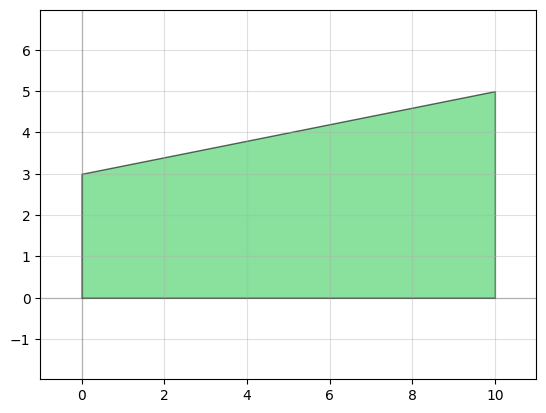

In [1]:
from phidl import Device
from phidl import quickplot as qp # Rename "quickplot()" to the easier "qp()"
import phidl.geometry as pg

D = Device('mydevice')
xpts = (0,10,10, 0)
ypts = (0, 0, 5, 3)
poly1 = D.add_polygon( [xpts, ypts], layer = 0)

qp(D) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


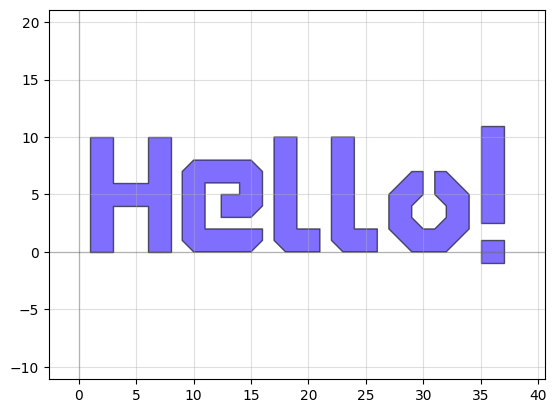

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


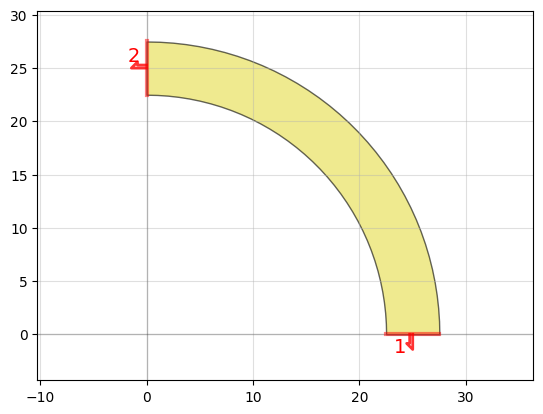

In [2]:
T = pg.text('Hello!', layer = 1)
A = pg.arc(radius = 25, width = 5, theta = 90, layer = 3)

qp(T) # quickplot it!
qp(A) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


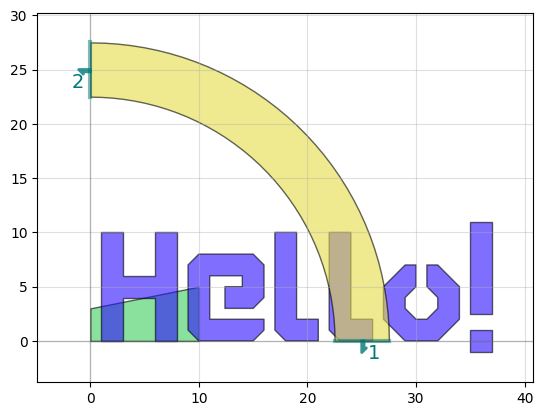

In [3]:
text1 = D.add_ref(T) # Add the text we created as a reference
arc1 = D.add_ref(A) # Add the arc we created

qp(D) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


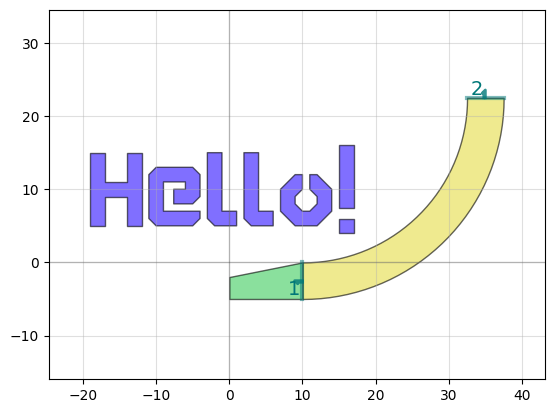

In [4]:
text1.movey(5)
text1.movex(-20)
arc1.rotate(-90)
arc1.move([10,22.5])
poly1.ymax = 0

qp(D) # quickplot it!

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


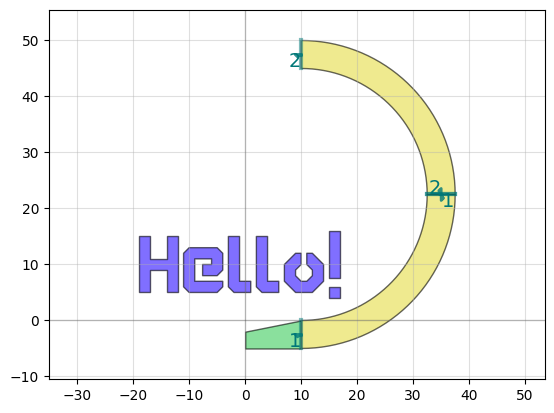

In [5]:
arc2 = D.add_ref(A) # Add a second reference the arc we created earlier
arc2.connect(port = 1, destination = arc1.ports[2])

qp(D) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


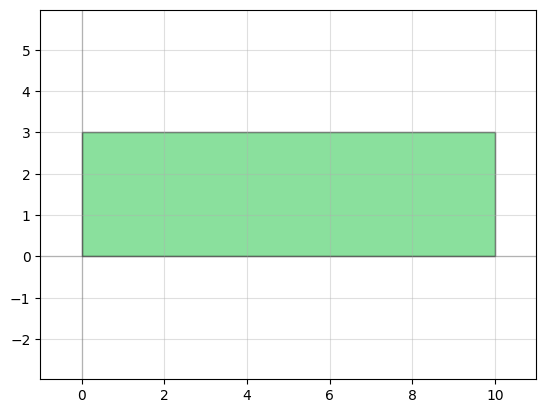

In [6]:
import numpy as np
# First we create a blank device `R` (R can be thought of as a blank
# GDS cell with some special features). Note that when we
# make a Device, we usually assign it a variable name with a capital letter
R = Device('rect')

# Next, let's make a list of points representing the points of the rectangle
# for a given width and height
width = 10
height = 3
points =  [(0, 0), (width, 0), (width, height), (0, height)]

# Now we turn these points into a polygon shape using add_polygon()
R.add_polygon(points)

# Let's use the built-in "quickplot" function to display the polygon we put in D
qp(R)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


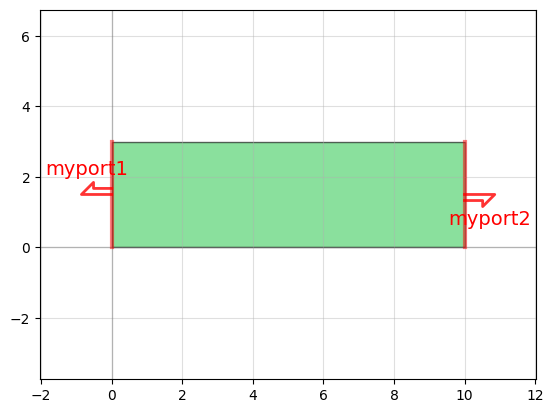

In [7]:
# Ports are defined by their width, midpoint, and the direction (orientation) they're facing
# They also must have a name -- this is usually a string or an integer
R.add_port(name = 'myport1', midpoint = [0,height/2], width = height, orientation = 180)
R.add_port(name = 'myport2', midpoint = [width,height/2], width = height, orientation = 0)

# The ports will show up when we quickplot() our shape
qp(R) # quickplot it!

In [8]:
print(R)

Device (name "rect" (uid 4), ports ['myport1', 'myport2'], aliases [], 1 polygons, 0 references)


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


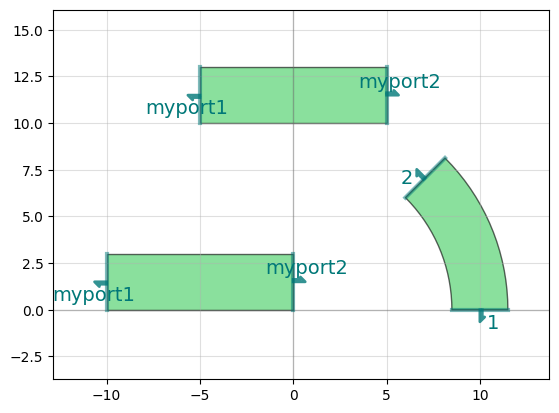

In [9]:
# Create a new blank Device
E = Device('arc_with_rectangles')

# Also create an arc from the built-in "pg" library
A = pg.arc(width = 3)

# Add a "reference" of the arc to our blank Device
arc_ref = E.add_ref(A)

# Also add two references to our rectangle Device
rect_ref1 = E.add_ref(R)
rect_ref2 = E.add_ref(R)

# Move the shapes around a little
rect_ref1.move([-10,0])
rect_ref2.move([-5,10])

qp(E) # quickplot it!

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


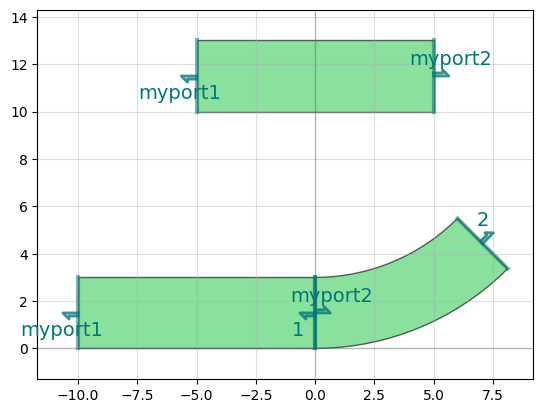

In [10]:
# First, we recall that when we created the references above we saved
# each one its own variable: arc_ref, rect_ref1, and rect_ref2
# We'll use these variables to control/move the reference shapes.

# First, let's move the arc so that it connects to our first rectangle.
# In this command, we tell the arc reference 2 things: (1) what port
# on the arc we want to connect, and (2) where it should go
arc_ref.connect(port = 1, destination = rect_ref1.ports['myport2'])

qp(E) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


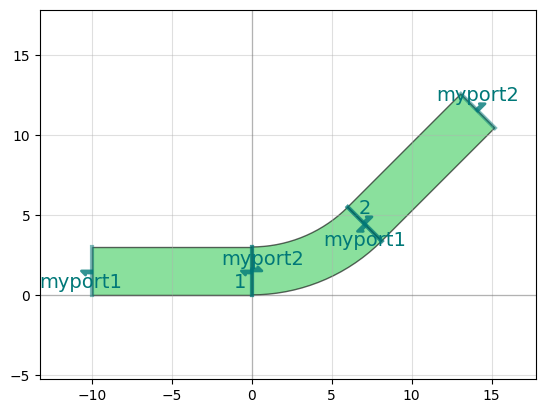

In [11]:
# Then we want to move the second rectangle reference so that
# it connects to port 2 of the arc
rect_ref2.connect('myport1', arc_ref.ports[2])

qp(E) # quickplot it!

In [12]:
print(E)

Device (name "arc_with_rectangles" (uid 5), ports [], aliases [], 0 polygons, 3 references)


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


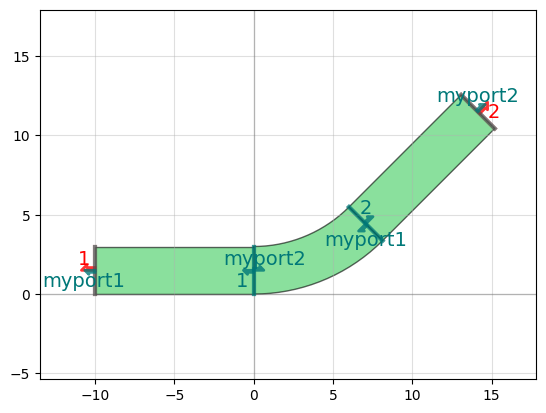

In [13]:
# Rather than specifying the midpoint/width/orientation, we can instead
# copy ports directly from the references since they're already in the right place
E.add_port(name = 1, port = rect_ref1.ports['myport1'])
E.add_port(name = 2, port = rect_ref2.ports['myport2'])

qp(E) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


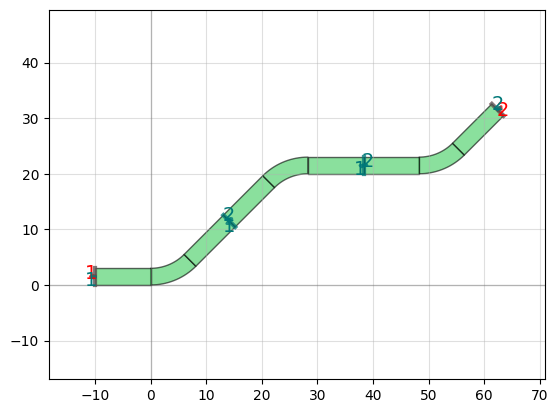

In [14]:
# Create a blank Device
D = Device('triple-bend')

# Add 3 references to our bend-shape Device `E`:
bend_ref1 = D.add_ref(E)  # Using the function add_ref()
bend_ref2 = D << E        # Using the << operator which is identical to add_ref()
bend_ref3 = D << E

# Let's mirror one of them so it turns right instead of left
bend_ref2.mirror()

# Connect each one in a series
bend_ref2.connect(1, bend_ref1.ports[2])
bend_ref3.connect(1, bend_ref2.ports[2])

# Add ports so we can use this shape at an even higher-level
D.add_port(name = 1, port = bend_ref1.ports[1])
D.add_port(name = 2, port = bend_ref3.ports[2])

qp(D) # quickplot it!

In [16]:
D.write_gds(filename = 'triple-bend.gds', # Output GDS file name
            unit = 1e-6,                  # Base unit (1e-6 = microns)
            precision = 1e-9,             # Precision / resolution (1e-9 = nanometers)
            auto_rename = True,           # Automatically rename cells to avoid collisions
            max_cellname_length = 28,     # Max length of cell names
            cellname = 'toplevel'         # Name of output top-level cell
           )

'triple-bend.gds'

# Moving/Rotating

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


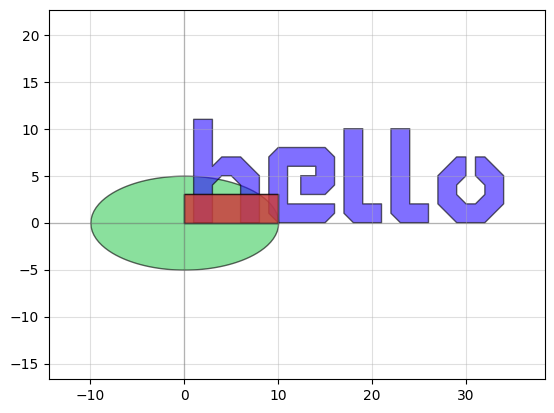

In [1]:
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

# Start with a blank Device
D = Device()

# Create some more shape Devices
T = pg.text('hello', size = 10, layer = 1)
E = pg.ellipse(radii = (10,5))
R = pg.rectangle(size = (10,3), layer = 2)

# Add the shapes to D as references
text = D << T
ellipse = D << E
rect1 = D << R
rect2 = D << R

qp(D) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


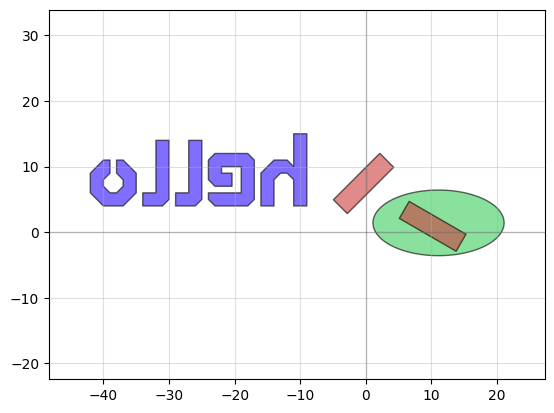

In [2]:
text.move([10,4]) # Translate by dx = 10, dy = 4
ellipse.move(origin = [1,1], destination = [2,2.5]) # Translate by dx = 1, dy = 1.5
rect1.move([1,1], [5,5], axis = 'y') # Translate by dx = 0, dy = 4 (motion only along y-axis)
rect2.movey(4) # Same as specifying axis='y' in the move() command
rect2.movex(4) # Same as specifying axis='x'' in the move() command
ellipse.movex(30,40) # Moves "from" x=30 "to" x=40 (i.e. translates by dx = 10)

rect1.rotate(45) # Rotate the first waveguide by 45 degrees around (0,0)
rect2.rotate(-30, center = [1,1]) # Rotate the second waveguide by -30 degrees around (1,1)

text.mirror(p1 = [1,1], p2 = [1,3]) # Reflects across the line formed by p1 and p2

qp(D) # quickplot it!

In [3]:
print('bounding box:')
print(text.bbox) # Will print the bounding box of text in terms of [(xmin, ymin), (xmax, ymax)]
print('xsize and ysize:')
print(text.xsize) # Will print the width of text in the x dimension
print(text.ysize) # Will print the height of text in the y dimension
print('center:')
print(text.center) # Gives you the center coordinate of its bounding box
print('xmax')
print(ellipse.xmax) # Gives you the rightmost (+x) edge of the ellipse bounding box

bounding box:
[[-42.   4.]
 [ -9.  15.]]
xsize and ysize:
33.0
11.000000000000004
center:
[-25.5   9.5]
xmax
21.0


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


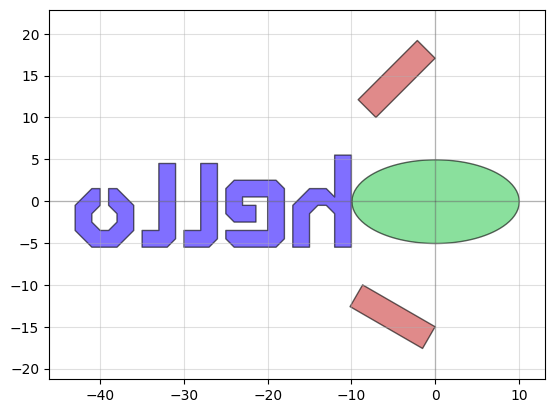

In [4]:
# First let's center the ellipse
ellipse.center = [0,0] # Move the ellipse such that the bounding box center is at (0,0)

# Next, let's move the text to the left edge of the ellipse
text.y = ellipse.y # Move the text so that its y-center is equal to the y-center of the ellipse
text.xmax = ellipse.xmin # Moves the ellipse so its xmax == the ellipse's xmin

# Align the right edge of the rectangles with the x=0 axis
rect1.xmax = 0
rect2.xmax = 0

# Move the rectangles above and below the ellipse
rect1.ymin = ellipse.ymax + 5
rect2.ymax = ellipse.ymin - 5

qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


10.0


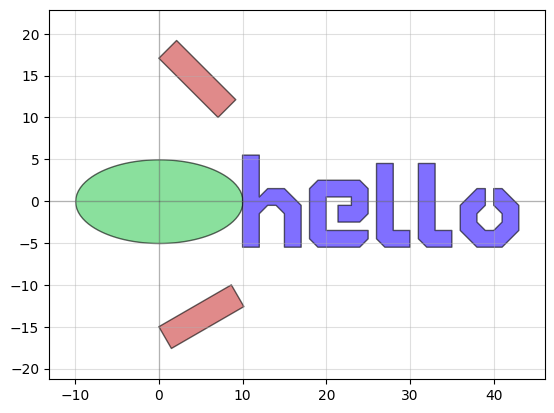

In [5]:
print(D.xmax) # Prints out '10.0'

D.mirror((0,1)) # Mirror across line made by (0,0) and (0,1)

qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


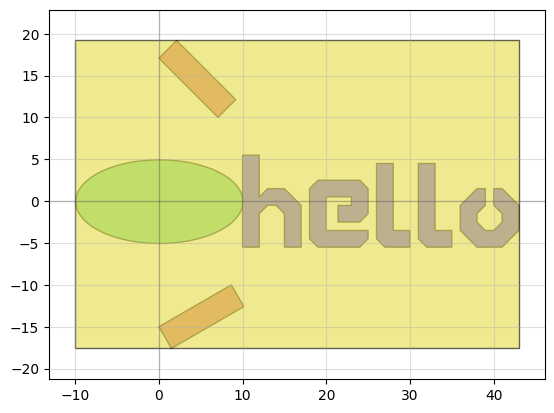

In [6]:
# The phidl.geometry library has a handy bounding-box function
# which takes a bounding box and creates a rectangle shape for it
device_bbox = D.bbox
D << pg.bbox(device_bbox, layer = 3)

qp(D)

In [7]:
print('Center of Device D:')
print(D.center)

print('X-max of Device D:')
print(D.xmax)

Center of Device D:
[16.5         0.79715597]
X-max of Device D:
43.0


# References

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


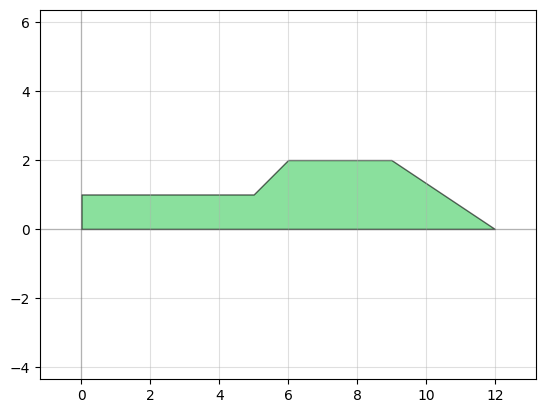

In [8]:
import numpy as np
import phidl.geometry as pg
from phidl import Device
from phidl import quickplot as qp


# Create a blank Device
P = Device()

# Add a polygon
xpts = [0,0,5,6,9,12]
ypts = [0,1,1,2,2,0]
P.add_polygon([xpts,ypts])

# Quickplot the Device with the polygon in it
qp(P)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


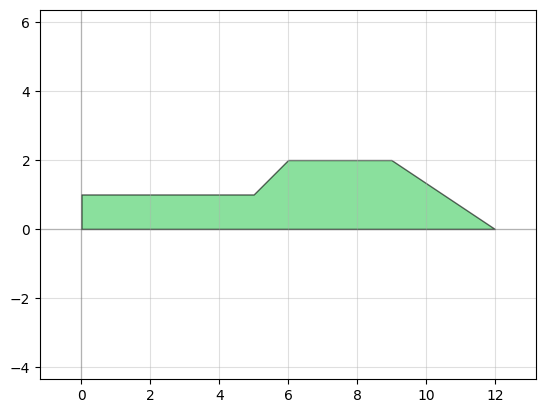

In [9]:
D = Device()             # Create a new blank Device
poly_ref = D.add_ref(P)  # Reference the Device "P" that has the polygon in it

qp(D) # Quickplot the reference-containing device "D"

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


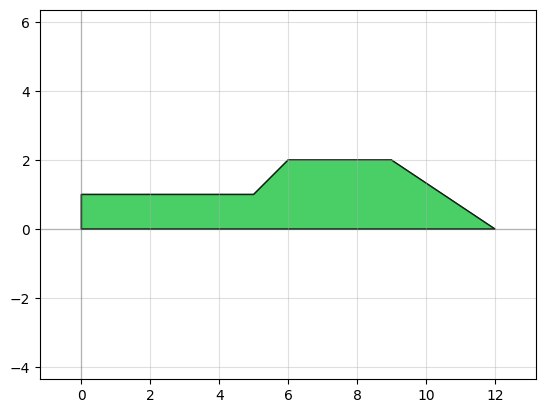

In [10]:
poly_ref2 = D.add_ref(P)  # Reference the Device "P" that has the polygon in it
poly_ref3 = D.add_ref(P)  # Reference the Device "P" that has the polygon in it

qp(D) # Quickplot the reference-containing device "D"

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


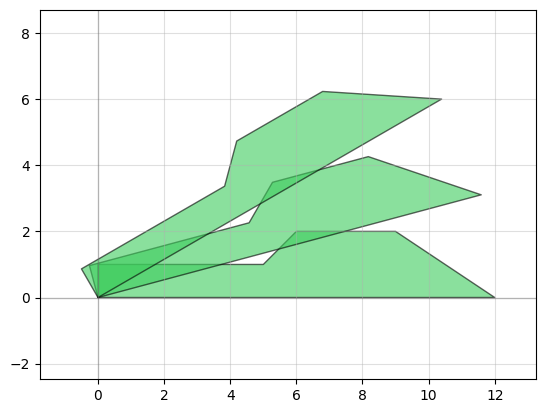

In [11]:
poly_ref2.rotate(15) # Rotate the 2nd reference we made 15 degrees
poly_ref3.rotate(30) # Rotate the 3rd reference we made 30 degrees

qp(D) # Quickplot the reference-containing device "D"

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


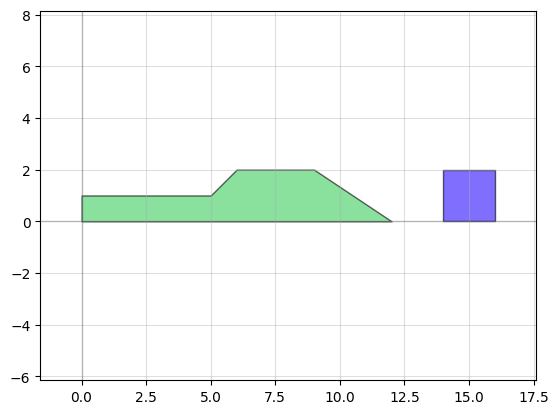

In [12]:
# Add a 2nd polygon to "P"
xpts = [14,14,16,16]
ypts = [0,2,2,0]
P.add_polygon([xpts,ypts], layer = 1)

qp(P) # Quickplot the "P" with its 2 polygons

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


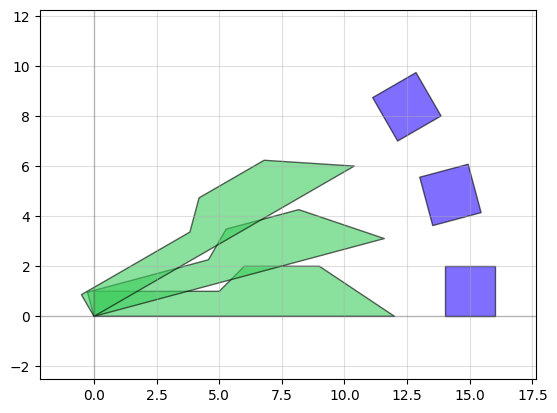

In [13]:
qp(D)  # Quickplot the reference-containing device "D"

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


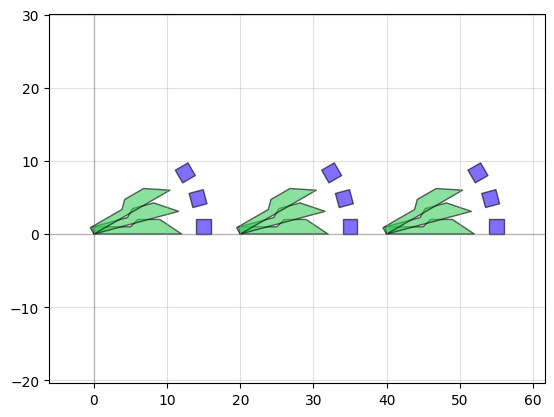

In [16]:
X = Device()             # Create a new blank Device
d_ref1 = X.add_ref(D)  # Reference the Device "D" that 3 references in it
d_ref2 = X << D        # Use the "<<" operator to create a 2nd reference to D
d_ref3 = X << D        # Use the "<<" operator to create a 3rd reference to D

d_ref1.move([20,0])
d_ref2.move([40,0])

qp(X) # Quickplot the reference-containing device "D"

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


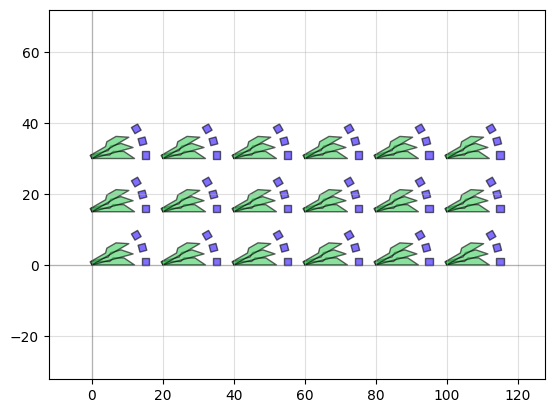

In [18]:
A = Device()           # Create a new blank Device
d_ref1 = A.add_array(D, columns = 6, rows = 3, spacing = [20,15])  # Reference the Device "D" that 3 references in it

qp(A) # Quickplot the reference-containing device "D"

# Layers

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


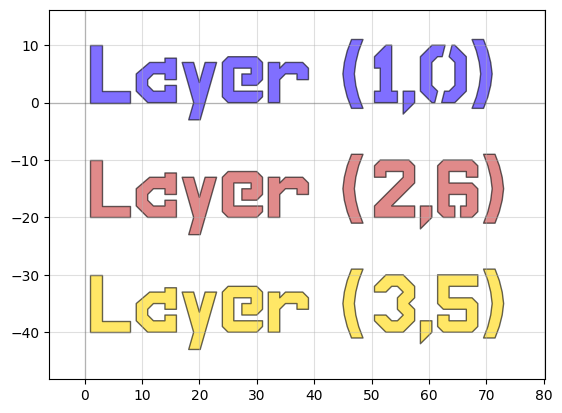

In [19]:
import phidl.geometry as pg
from phidl import Device, Layer, LayerSet
from phidl import quickplot as qp


D = Device()

# Specify layer with a single integer 0-255 (gds datatype will be set to 0)
layer1 = 1

# Specify layer as 1, equivalent to layer = 2, datatype = 6
layer2 = (2,6)

# Specify layer as 2, equivalent to layer = 2, datatype = 0
layer3 = Layer(gds_layer = 3, gds_datatype = 5, color = 'gold')

D << pg.text('Layer (1,0)', layer = layer1)
D << pg.text('Layer (2,6)', layer = layer2).movey(-20)
D << pg.text('Layer (3,5)', layer = layer3).movey(-40)

qp(D)

In [20]:
# Note each element of the set must be a valid layer input by itself
my_layers = {1, (3,5), (3,6), (7,8)}
D = pg.ellipse(layer = my_layers)

In [21]:
ls = LayerSet() # Create a blank LayerSet

ls.add_layer(name = 'au', gds_layer = 4, gds_datatype = 0,
             description = 'Gold wiring', color = 'goldenrod')
ls.add_layer(name = 'nb', gds_layer = 5, gds_datatype = 0,
             description = 'Niobium liftoff', color = (0.4,0.5,0.7))
ls.add_layer('nb_etch', 6, 0, color = 'lightblue', alpha = 0.2)
ls.add_layer('silicon', 8, 2, color = 'green', alpha = 0.4)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


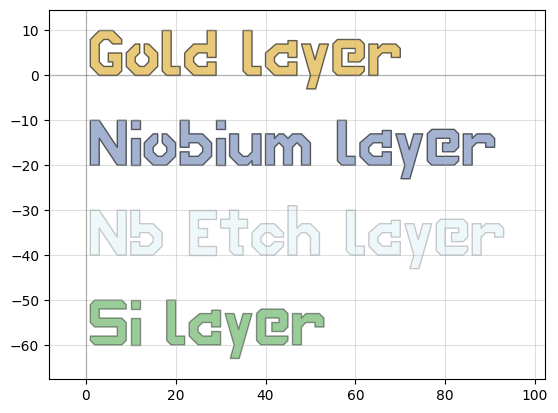

In [22]:
D = Device()

gold_layer = ls['au']

D.add_ref( pg.text('Gold layer', size = 10, layer = ls['au']) ).movey(0)
D.add_ref( pg.text('Niobium layer', size = 10, layer = ls['nb']) ).movey(-20)
D.add_ref( pg.text('Nb Etch layer', size = 10, layer = ls['nb_etch']) ).movey(-40)
D.add_ref( pg.text('Si layer', size = 10, layer = ls['silicon']) ).movey(-60)

qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


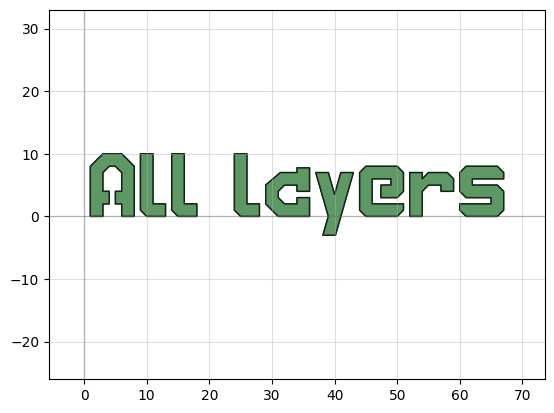

In [23]:
T = pg.text('All layers', layer = ls)
qp(T)

In [24]:
print(ls['nb'])

Layer (name nb, GDS layer 5, GDS datatype 0, description Niobium liftoff, color #6680b2)


Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


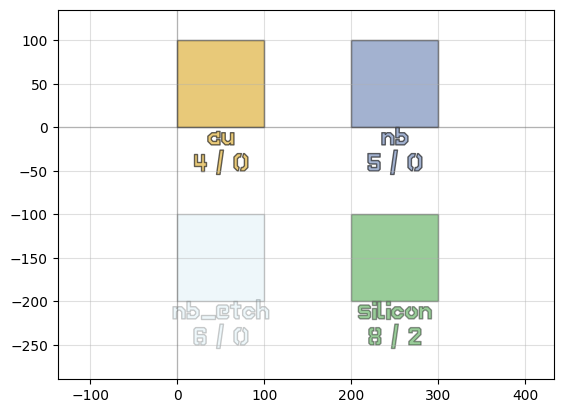

In [25]:
D = pg.preview_layerset(ls)
qp(D)

In [26]:
import phidl.utilities as pu
pu.write_lyp('my_layer_properties_file.lyp', layerset = ls)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


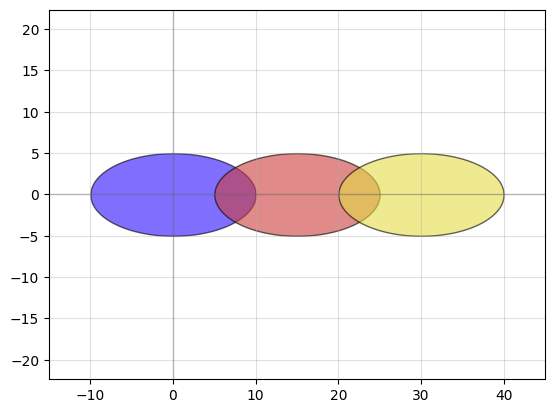

In [27]:
def many_ellipses(layer1 = 1, layer2 = 2, layer3 = 3):
    D = Device()
    D << pg.ellipse(layer = layer1)
    D << pg.ellipse(layer = layer2).movex(15)
    D << pg.ellipse(layer = layer3).movex(30)

    return D

qp(many_ellipses(layer1 = 1, layer2 = 2, layer3 = 3))

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


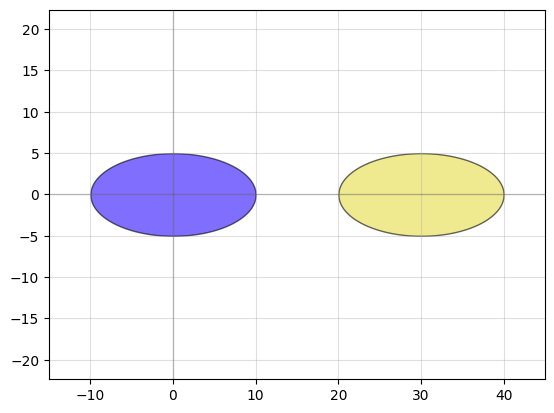

In [28]:
qp(many_ellipses(layer1 = 1, layer2 = None, layer3 = 3))

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


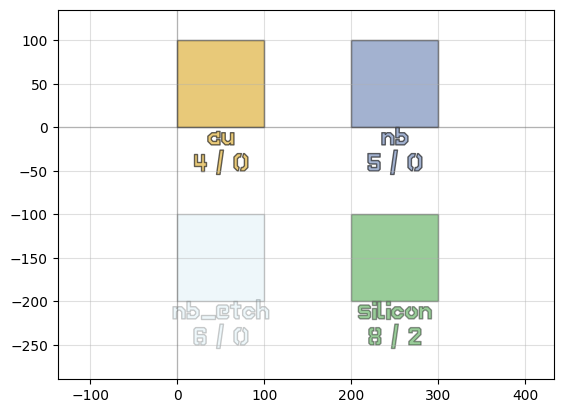

In [29]:
D = pg.preview_layerset(ls)
qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


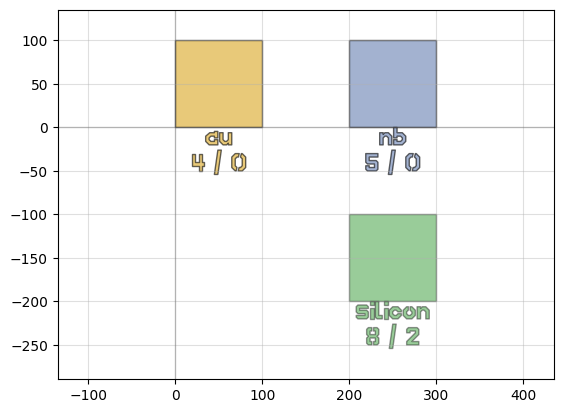

In [30]:
D.remove_layers(layers = [6,8])
qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


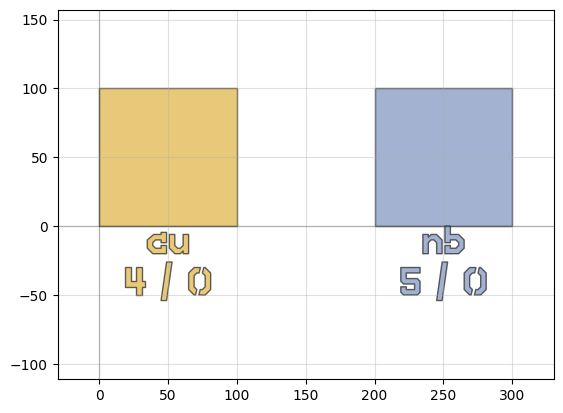

In [31]:
D.remove_layers(layers = [(8,2)])
qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


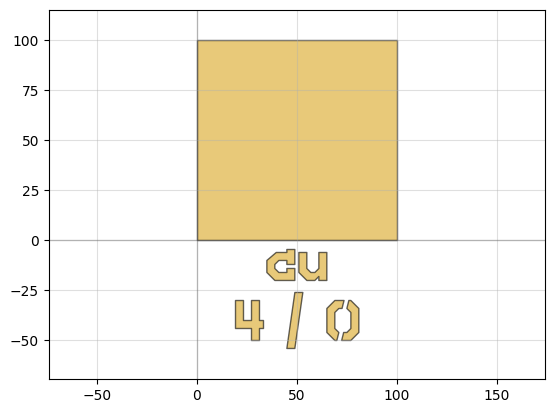

In [32]:
D.remove_layers(layers = [4], invert_selection = True)
qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


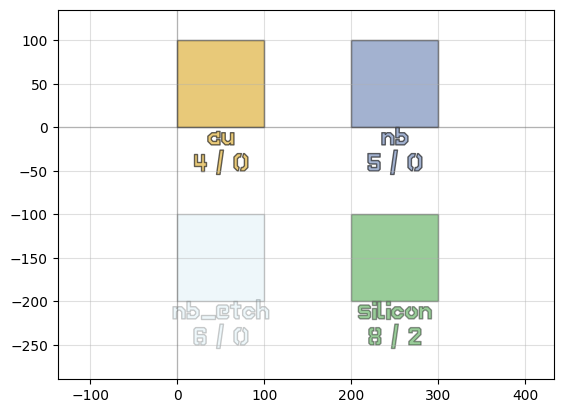

In [33]:
D = pg.preview_layerset(ls)
qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


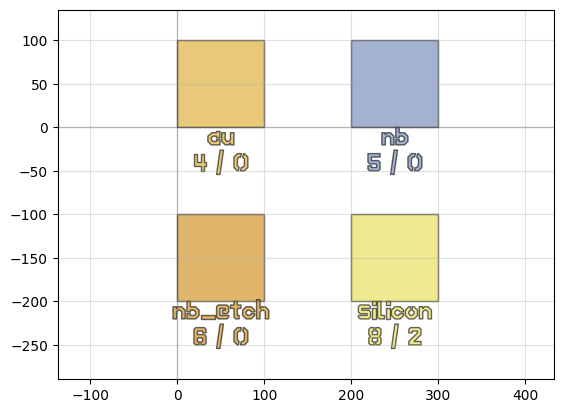

In [34]:
D.remap_layers(layermap = {(8,2): 99,
                             6  : 77,
                           })
qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


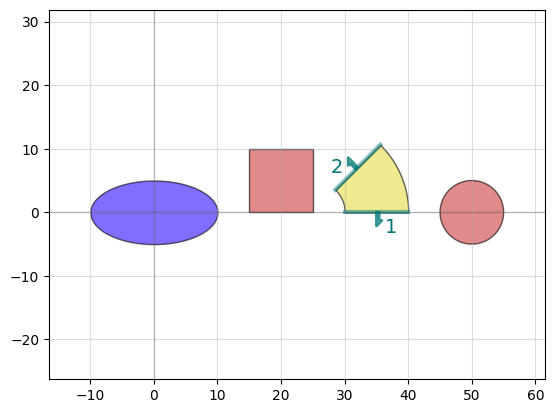

In [35]:
D = Device()

D << pg.ellipse(layer = 1)
D << pg.rectangle(size = (10,10), layer = 2).movex(15)
D << pg.arc(width = 10, layer = 3).movex(25)
D << pg.circle(radius = 5, layer = 2).movex(50)

qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


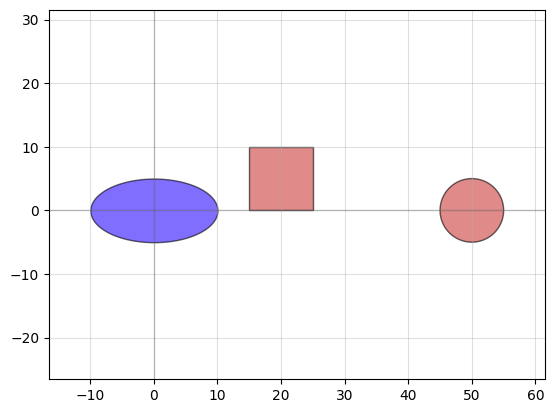

In [36]:
D_only_layers_1_and_2 = pg.extract(D, layers = [1,2])
qp(D_only_layers_1_and_2)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


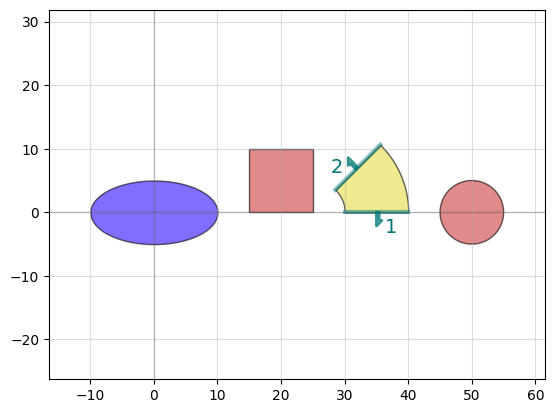

In [37]:
qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


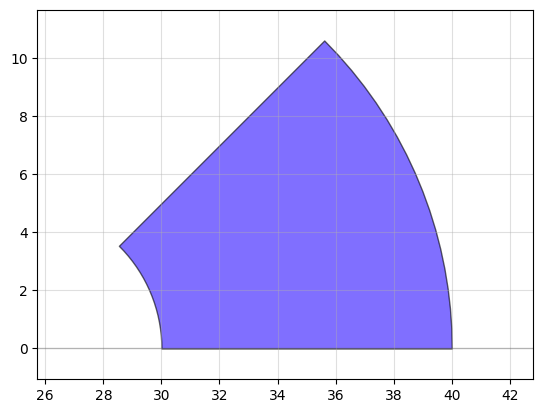

In [38]:
D_copied = pg.copy_layer(D, layer = 3, new_layer = 1)
qp(D_copied)

# Grouping

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


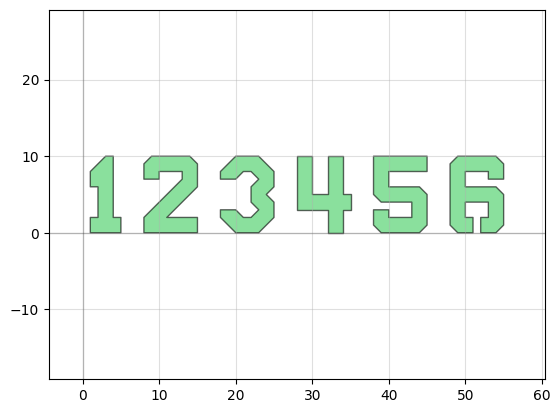

In [39]:
import numpy as np
import phidl.geometry as pg
from phidl import quickplot as qp
from phidl import Device

from phidl import Group

# Create a blank Device and add number shapes to it
D = Device()
t1 = D << pg.text('1')
t2 = D << pg.text('2')
t3 = D << pg.text('3')
t4 = D << pg.text('4')
t5 = D << pg.text('5')
t6 = D << pg.text('6')

# Spread out devices
D.distribute(direction = 'x', spacing = 3)

qp(D) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


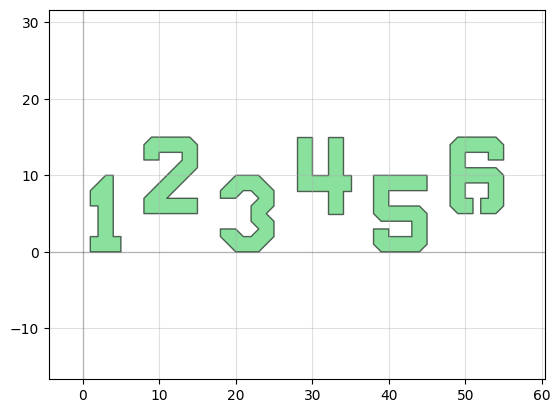

In [40]:
even = Group([t2,t4,t6])
even.movey(5)

qp(D) # quickplot it!

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


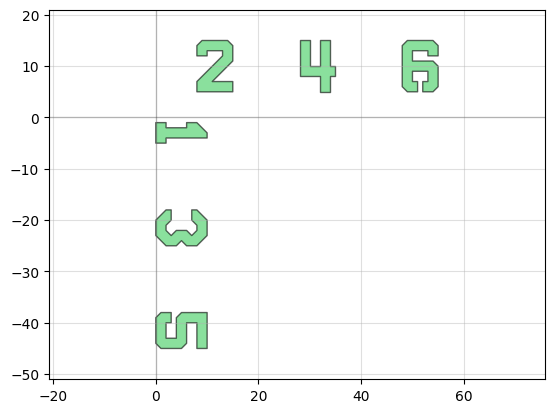

In [41]:
odd = t1 + t3 + t5 # Create the Group
odd.rotate(-90)    # Rotate the Group

qp(D) # quickplot it!

In [42]:
one_to_five = t1 + t2    # Create the group
one_to_five.add([t3,t4]) # Add more elements with the "add" method
one_to_five += t5        # Equivalently, add more elements with the '+=' operator

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


15.0


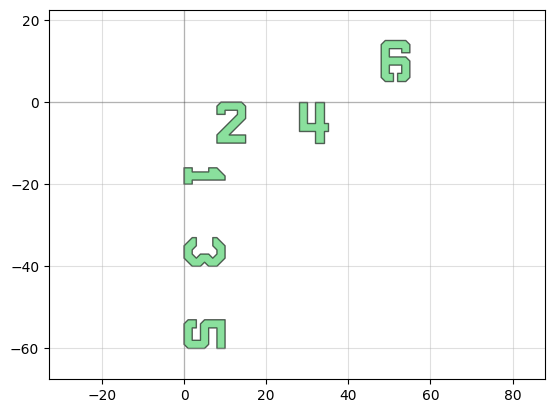

In [43]:
print(one_to_five.ymax)
one_to_five.ymax = 0

qp(D) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


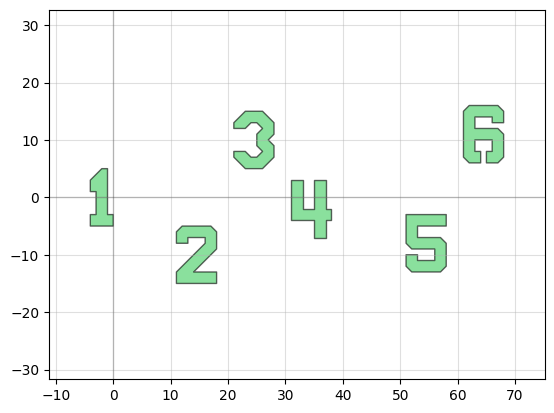

In [44]:
# Create a blank Device and add number shapes to it
D = Device()
t1 = D << pg.text('1').move([-5,-5])
t2 = D << pg.text('2').move([10,-15])
t3 = D << pg.text('3').move([20, 5])
t4 = D << pg.text('4').move([30, -7])
t5 = D << pg.text('5').move([50, -13])
t6 = D << pg.text('6').move([60,6])

qp(D) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


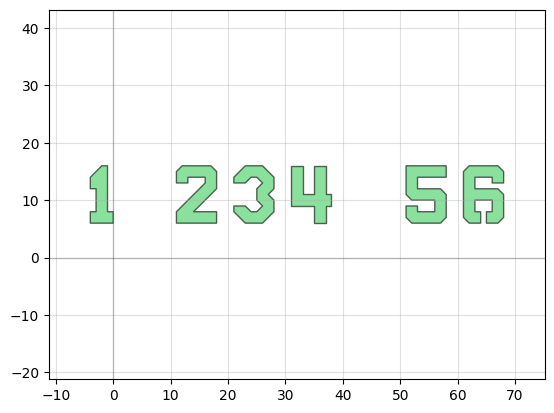

In [45]:
all_numbers = (t1+t2+t3+t4+t5+t6)     # Make a Group of all the numbers
all_numbers.align(alignment = 'ymax') # Align the ymax of all the numbers

qp(D) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


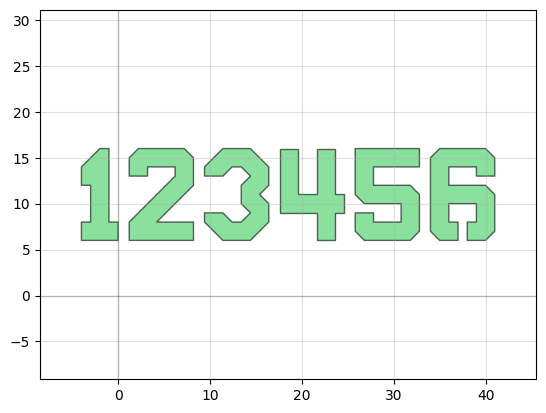

In [46]:
all_numbers.distribute(direction = 'x', spacing = 1.2, separation = True)

qp(D) # quickplot it!

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


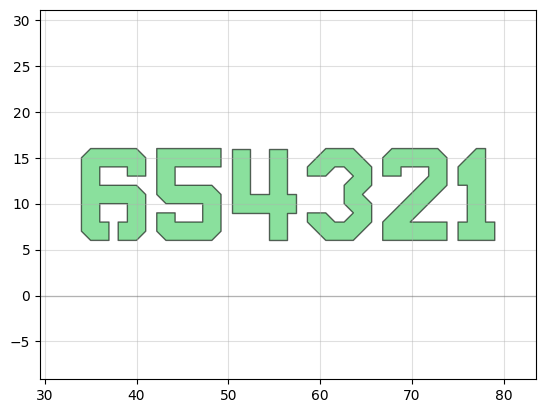

In [47]:
all_numbers_reverse = (t6 + t5 + t4 + t3 + t2 + t1) # Start with t6, then t5, ...
all_numbers_reverse.distribute(direction = 'x', spacing = 1.2, separation = True)

qp(D) # quickplot it!

# Paths/Waveguides

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


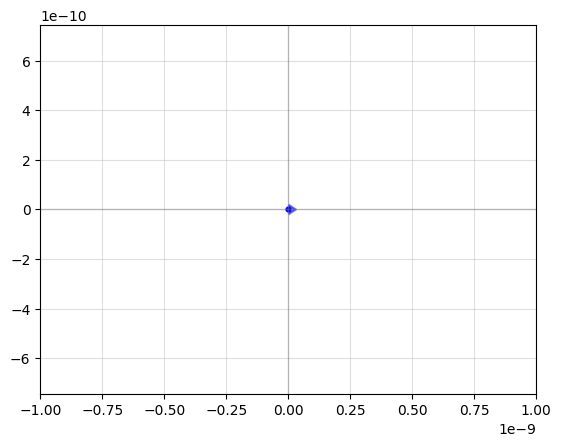

In [48]:
from phidl import Path
import phidl.path as pp
from phidl import quickplot as qp

P = Path()
qp(P)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


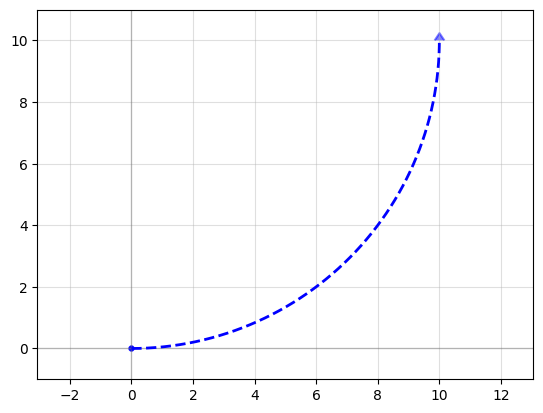

In [49]:
from phidl import Path, CrossSection, Device
import phidl.path as pp

P = Path()
P.append( pp.arc(radius = 10, angle = 90) )   # Circular arc

qp(P)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


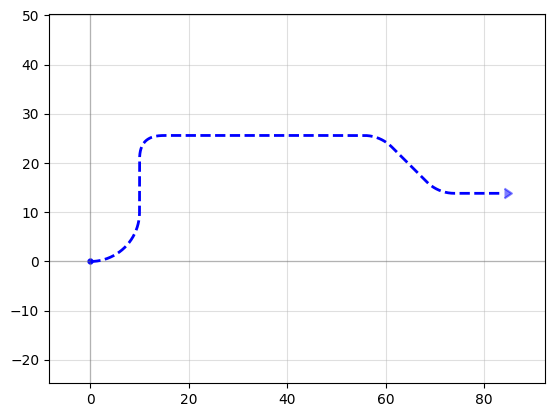

In [50]:
from phidl import Path, CrossSection, Device
import phidl.path as pp

P = Path()
P.append( pp.arc(radius = 10, angle = 90) )   # Circular arc
P.append( pp.straight(length = 10) )          # Straight section
P.append( pp.euler(radius = 3, angle = -90) ) # Euler bend (aka "racetrack" curve)
P.append( pp.straight(length = 40) )
P.append( pp.arc(radius = 8, angle = -45) )
P.append( pp.straight(length = 10) )
P.append( pp.arc(radius = 8, angle = 45) )
P.append( pp.straight(length = 10) )

qp(P)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


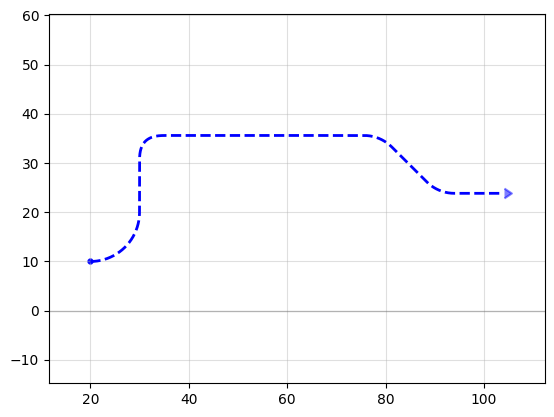

In [51]:
P.movey(10)
P.xmin = 20
qp(P)

In [52]:
P.length()

np.float64(107.69901058617913)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


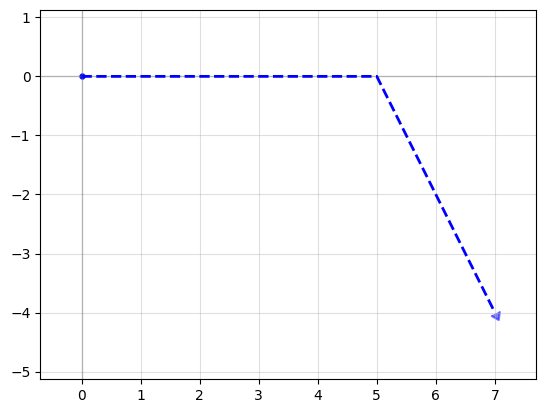

In [53]:
P2 = Path()
pts = [(1, 0), (1, 5), (5, 7)]
P2.append(pts)
qp(P2)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


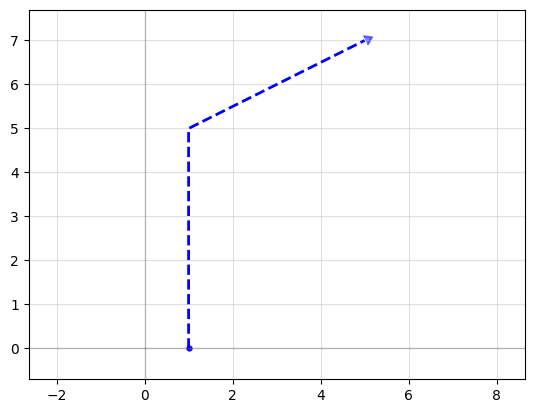

In [54]:
P2 = Path([(1, 0), (1, 5), (5, 7)])
qp(P2)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


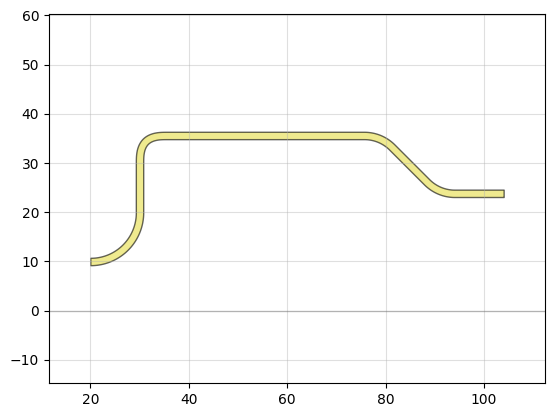

In [55]:
waveguide_device = P.extrude(1.5, layer = 3)
qp(waveguide_device)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


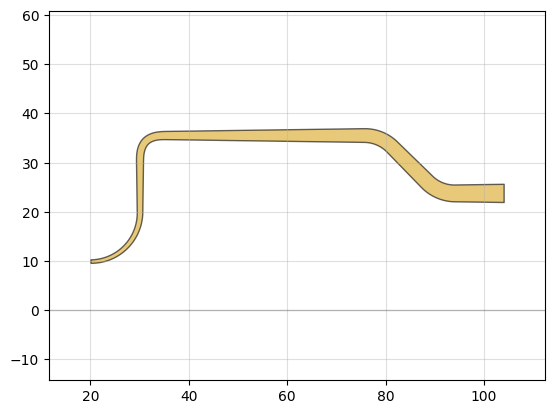

In [56]:
waveguide_device = P.extrude([0.7,3.7], layer = 4)
qp(waveguide_device)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


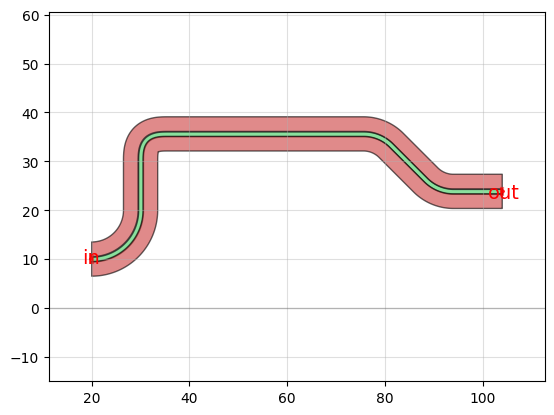

In [57]:
# Create a blank CrossSection
X = CrossSection()

# Add a a few "sections" to the cross-section
X.add(width = 1, offset = 0, layer = 0, ports = ('in','out'))
X.add(width = 3, offset = 2, layer = 2)
X.add(width = 3, offset = -2, layer = 2)

# Combine the Path and the CrossSection
waveguide_device = P.extrude(X)

# Quickplot the resulting Device
qp(waveguide_device)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


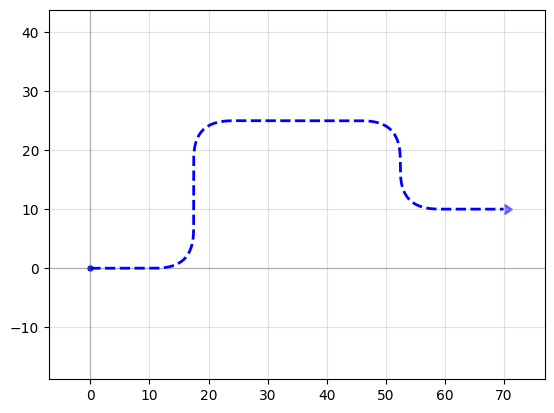

In [58]:
P = Path()

# Create the basic Path components
left_turn = pp.euler(radius = 4, angle = 90)
right_turn = pp.euler(radius = 4, angle = -90)
straight = pp.straight(length = 10)

# Assemble a complex path by making list of Paths and passing it to `append()`
P.append([
    straight,
    left_turn,
    straight,
    right_turn,
    straight,
    straight,
    right_turn,
    left_turn,
    straight,
])

qp(P)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


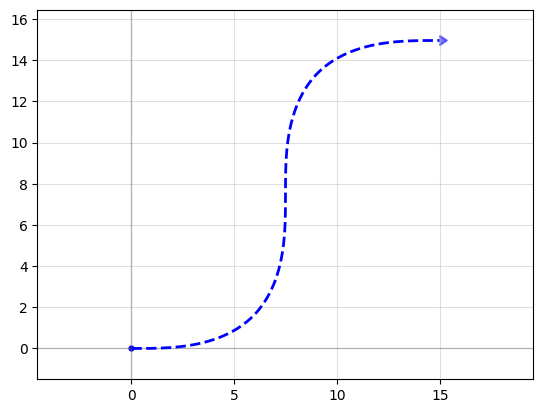

In [59]:
P = Path()

# Create an "S-turn" just by making a list
s_turn = [left_turn, right_turn]

P.append(s_turn)

qp(P)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


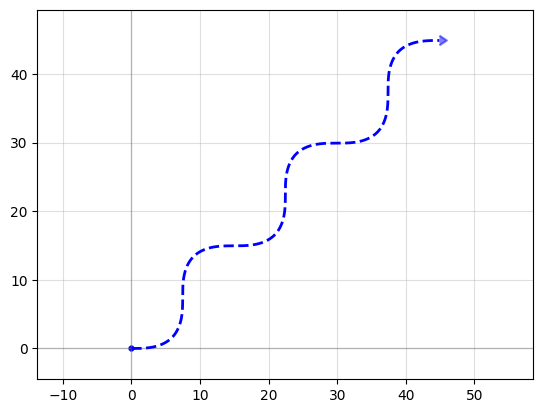

In [60]:
P = Path()

# Create an "S-turn" using a list
s_turn = [left_turn, right_turn]
# Repeat the S-turn 3 times by nesting our S-turn list 3x times in another list
triple_s_turn = [s_turn, s_turn, s_turn]

P.append(triple_s_turn)

qp(P)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


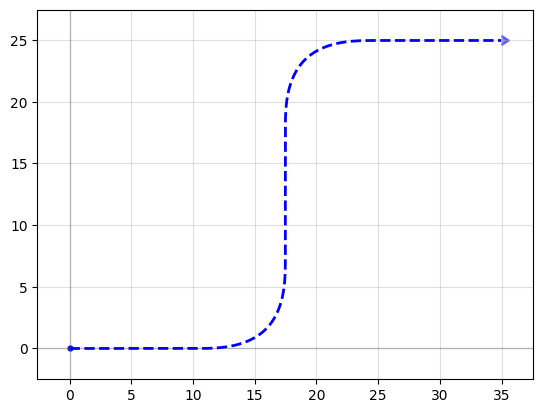

In [61]:
P = Path([straight, left_turn, straight, right_turn, straight])
qp(P)

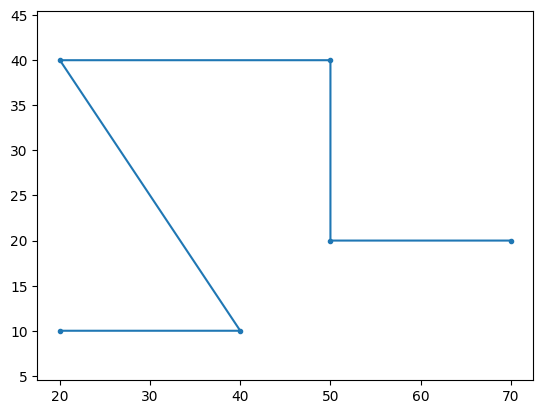

In [63]:
import numpy as np
import matplotlib.pyplot as plt

points = np.array([(20,10), (40,10), (20,40), (50,40), (50,20), (70,20)])
plt.plot(points[:,0], points[:,1], '.-')
plt.axis('equal');

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


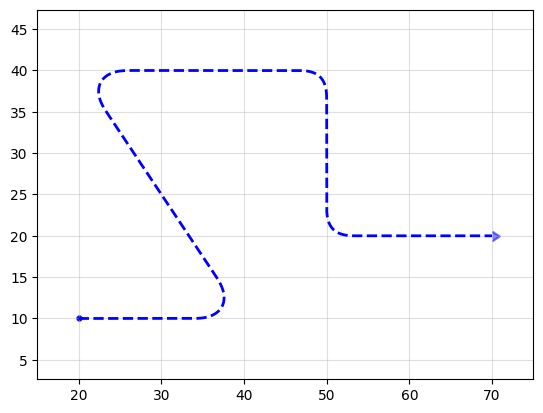

In [65]:
points = np.array([(20,10), (40,10), (20,40), (50,40), (50,20), (70,20)])

P = pp.smooth(
    points = points,
    radius = 2,
    corner_fun = pp.euler, # Alternatively, use pp.arc
    use_eff = False,
    )
qp(P)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


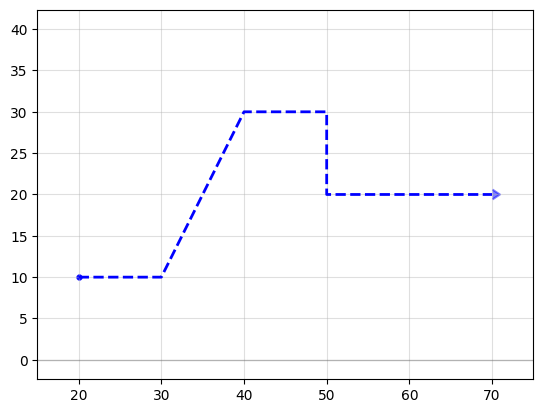

In [66]:
P = Path([(20,10), (30,10), (40,30), (50,30), (50,20), (70,20)])

qp(P)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


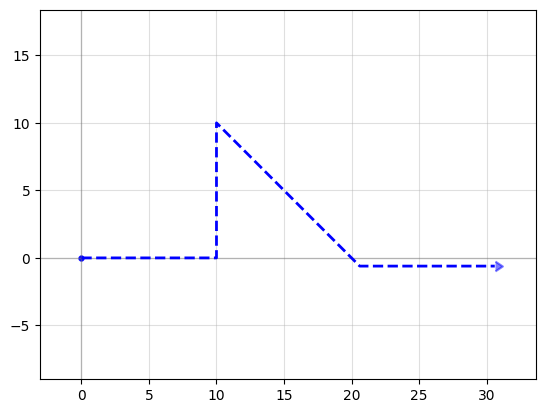

In [67]:
P = Path()
P.append( pp.straight(length = 10, num_pts = 2) )
P.end_angle += 90                    # "Turn" 90 deg (left)
P.append( pp.straight(length = 10, num_pts = 2) ) # "Walk" length of 10
P.end_angle += -135                  # "Turn" -135 degrees (right)
P.append( pp.straight(length = 15, num_pts = 2) ) # "Walk" length of 10
P.end_angle = 0                      # Force the direction to be 0 degrees
P.append( pp.straight(length = 10, num_pts = 2) ) # "Walk" length of 10
qp(P)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


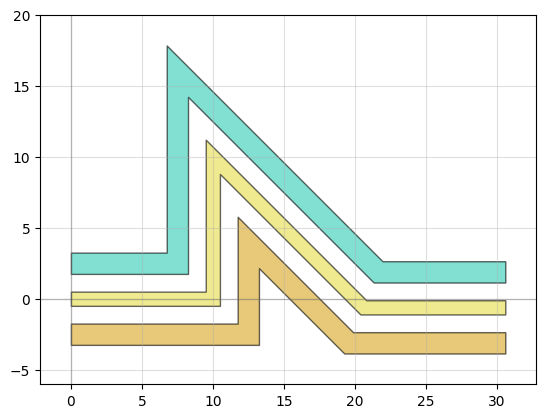

In [68]:
X = CrossSection()

X.add(width = 1, offset = 0, layer = 3)
X.add(width = 1.5, offset = 2.5, layer = 4)
X.add(width = 1.5, offset = -2.5, layer = 7)
wiring_device = P.extrude(X)

qp(wiring_device)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


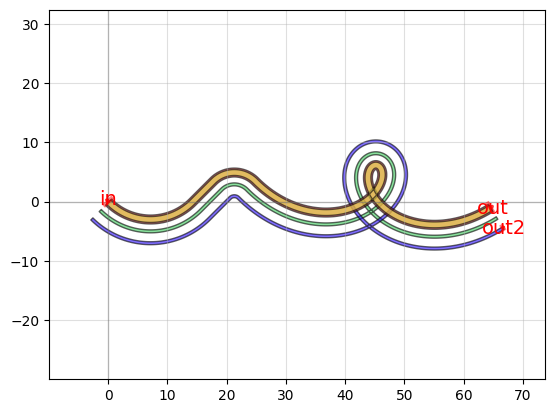

In [69]:
def looploop(num_pts = 1000):
    """ Simple limacon looping curve """
    t = np.linspace(-np.pi,0,num_pts)
    r = 20 + 25*np.sin(t)
    x = r*np.cos(t)
    y = r*np.sin(t)
    points = np.array((x,y)).T
    return points

# Create the path points
P = Path()
P.append( pp.arc(radius = 10, angle = 90) )
P.append( pp.straight())
P.append( pp.arc(radius = 5, angle = -90) )
P.append( looploop(num_pts = 1000) )
P.rotate(-45)

# Create the crosssection
X = CrossSection()
X.add(width = 0.5, offset = 2, layer = 0, ports = [None,None])
X.add(width = 0.5, offset = 4, layer = 1, ports = [None,'out2'])
X.add(width = 1.5, offset = 0, layer = 2, ports = ['in','out'])
X.add(width = 1, offset = 0, layer = 3)

D = P.extrude(X)
qp(D) # quickplot the resulting Device

In [70]:
import numpy as np
path_points = P.points       # Curve points are stored as a numpy array in P.points
print(np.shape(path_points)) # The shape of the array is Nx2
print(len(P))                # Equivalently, use len(P) to see how many points are inside

(1457, 2)
1457


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


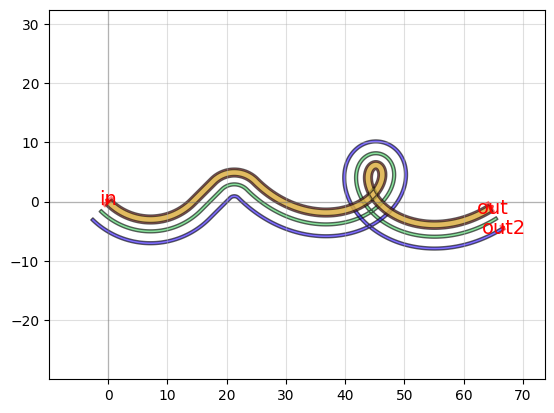

In [71]:
# The remaining points form a identical line to within `1e-3` from the original
D = P.extrude(X, simplify = 1e-3)
qp(D) # quickplot the resulting Device

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


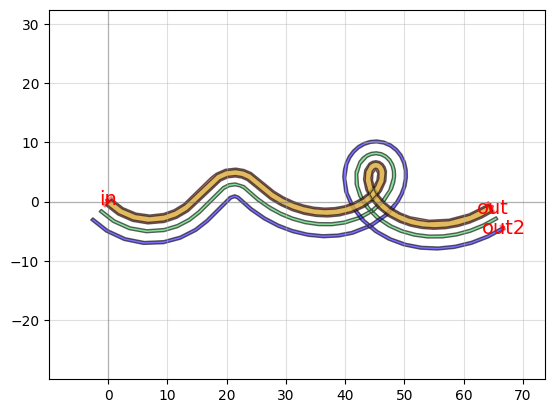

In [72]:
D = P.extrude(X, simplify = 1e-1)
qp(D) # quickplot the resulting Device

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


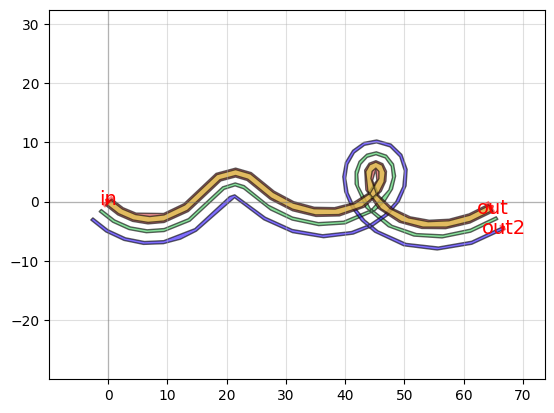

In [73]:
D = P.extrude(X, simplify = 0.3)
qp(D) # quickplot the resulting Device

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


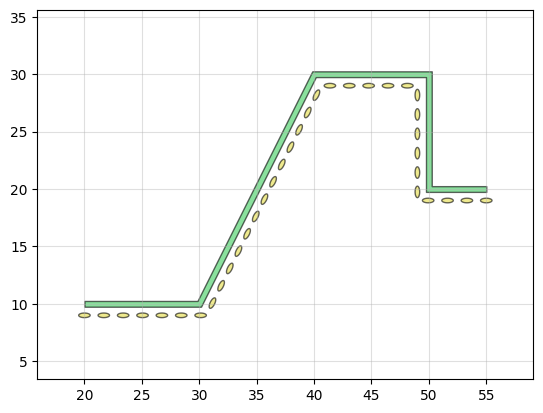

In [74]:
from phidl import Device, Path, quickplot as qp
import  phidl.geometry as pg
import numpy as np

# Create a path as well as a via to repeat along its length
P = Path([(20,10), (30,10), (40,30), (50,30), (50,20), (55,20)])
D = P.extrude(0.5)
Via = pg.ellipse(radii = (0.5,0.2), layer = 3)

# Get a list of points where the vias should go
distances = np.linspace(0, P.length(), 35)
offset = 1
points, angles = P.interpolate(distances, offset)

# Create references to the via, place them at the interpolated points,
# and rotate them so they point in the direction of the path
for (x,y), a in zip(points, angles):
    via = D << Via
    via.rotate(a)
    via.center = x,y

qp(D)

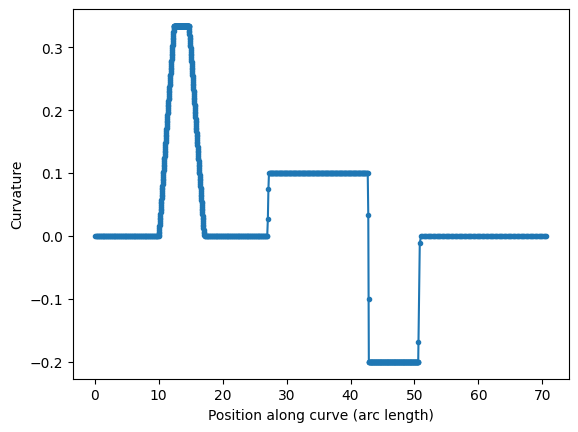

In [75]:
P = Path()
P.append([
    pp.straight(length = 10, num_pts = 100), # Curvature of 0
    # Euler straight-to-bend transition with min. bend radius of 3 (max curvature of 1/3)
    pp.euler(radius = 3, angle = 90, p = 0.5, use_eff = False),
    pp.straight(length = 10, num_pts = 100), # Curvature of 0
    pp.arc(radius = 10, angle = 90),         # Curvature of 1/10
    pp.arc(radius = 5, angle = -90),         # Curvature of -1/5
    pp.straight(length = 20, num_pts = 100), # Curvature of 0
    ])

s,K = P.curvature()
plt.plot(s,K,'.-')
plt.xlabel('Position along curve (arc length)')
plt.ylabel('Curvature');

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


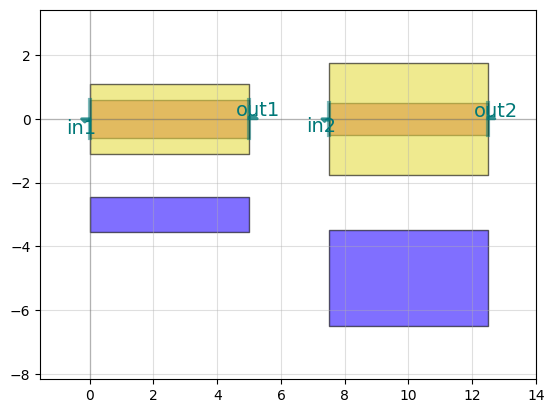

In [76]:
# Create our first CrossSection
X1 = CrossSection()
X1.add(width = 1.2, offset = 0, layer = 2, name = 'wg', ports = ('in1', 'out1'))
X1.add(width = 2.2, offset = 0, layer = 3, name = 'etch')
X1.add(width = 1.1, offset = 3, layer = 1, name = 'wg2')

# Create the second CrossSection that we want to transition to
X2 = CrossSection()
X2.add(width = 1, offset = 0, layer = 2, name = 'wg', ports = ('in2', 'out2'))
X2.add(width = 3.5, offset = 0, layer = 3, name = 'etch')
X2.add(width = 3, offset = 5, layer = 1, name = 'wg2')

# To show the cross-sections, let's create two Paths and
# create Devices by extruding them
P1 = pp.straight(length = 5)
P2 = pp.straight(length = 5)
WG1 = P1.extrude(X1)
WG2 = P2.extrude(X2)

# Place both cross-section Devices and quickplot them
D = Device()
wg1 = D << WG1
wg2 = D << WG2
wg2.movex(7.5)

qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


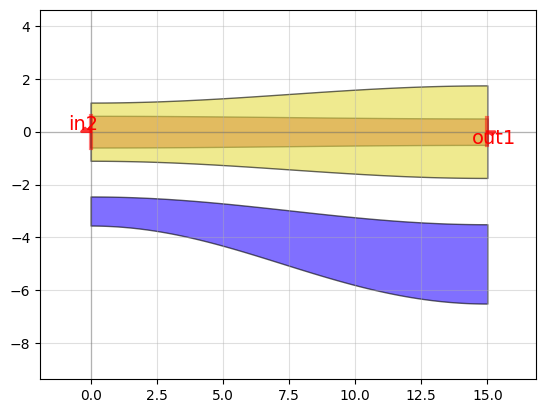

In [77]:
# Create the transitional CrossSection
Xtrans = pp.transition(cross_section1 = X1,
                       cross_section2 = X2,
                       width_type = 'sine')
# Create a Path for the transitional CrossSection to follow
P3 = pp.straight(length = 15)
# Use the transitional CrossSection to create a Device
WG_trans = P3.extrude(Xtrans)

qp(WG_trans)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


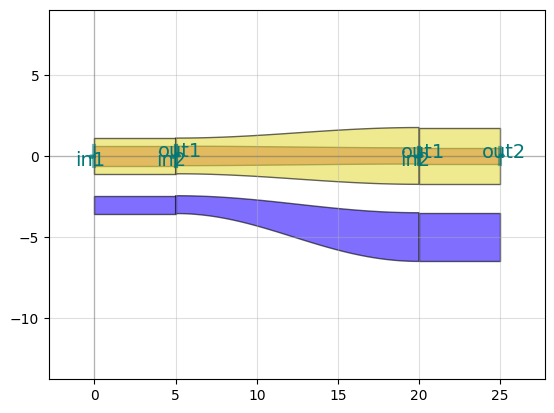

In [78]:
D = Device()
wg1 = D << WG1 # First cross-section Device
wg2 = D << WG2
wgt = D << WG_trans

wgt.connect('in2', wg1.ports['out1'])
wg2.connect('in2', wgt.ports['out1'])

qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


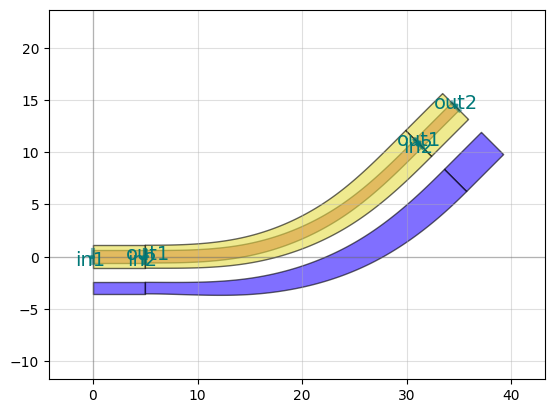

In [79]:
# Transition along a curving Path
P4 = pp.euler(radius = 25, angle = 45, p = 0.5, use_eff = False)
WG_trans = P4.extrude(Xtrans)

D = Device()
wg1 = D << WG1 # First cross-section Device
wg2 = D << WG2
wgt = D << WG_trans

wgt.connect('in2', wg1.ports['out1'])
wg2.connect('in2', wgt.ports['out1'])

qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


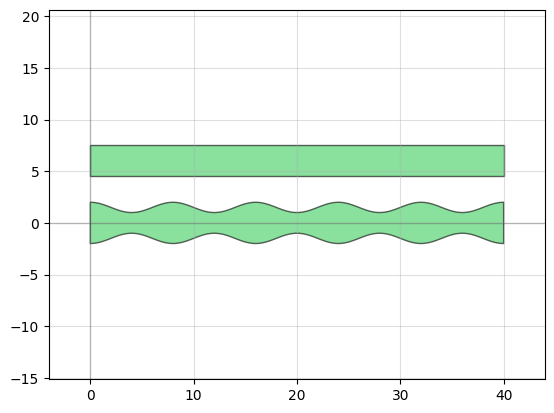

In [80]:
def my_custom_width_fun(t):
    # Note: Custom width/offset functions MUST be vectorizable--you must be able
    # to call them with an array input like my_custom_width_fun([0, 0.1, 0.2, 0.3, 0.4])
    num_periods = 5
    w =  3 + np.cos(2*np.pi*t * num_periods)
    return w

# Create the Path
P = pp.straight(length = 40)

# Create two cross-sections: one fixed width, one modulated by my_custom_offset_fun
X = CrossSection()
X.add(width = 3,                   offset = -6, layer = 0)
X.add(width = my_custom_width_fun, offset = 0,  layer = 0)

# Extrude the Path to create the Device
D = P.extrude(X)

qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


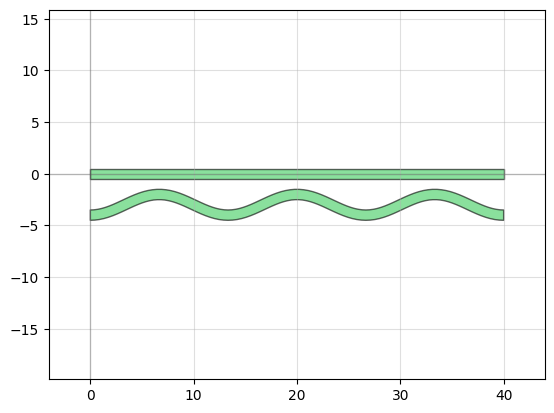

In [81]:
def my_custom_offset_fun(t):
    # Note: Custom width/offset functions MUST be vectorizable--you must be able
    # to call them with an array input like my_custom_offset_fun([0, 0.1, 0.2, 0.3, 0.4])
    num_periods = 3
    w =  3 + np.cos(2*np.pi*t * num_periods)
    return w

# Create the Path
P = pp.straight(length = 40)

# Create two cross-sections: one fixed offset, one modulated by my_custom_offset_fun
X = CrossSection()
X.add(width = 1, offset = my_custom_offset_fun, layer = 0)
X.add(width = 1, offset = 0, layer = 0)

# Extrude the Path to create the Device
D = P.extrude(X)

qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


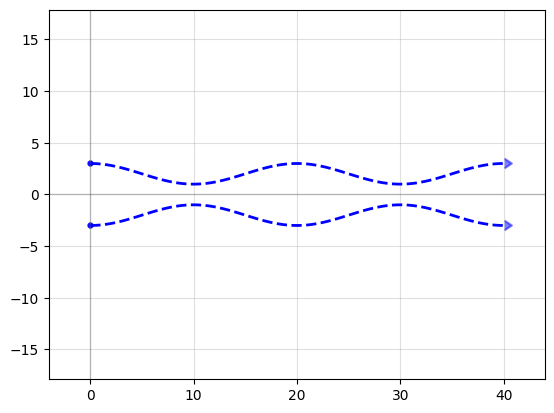

In [82]:
def my_custom_offset_fun(t):
    # Note: Custom width/offset functions MUST be vectorizable--you must be able
    # to call them with an array input like my_custom_offset_fun([0, 0.1, 0.2, 0.3, 0.4])
    num_periods = 2
    w =  2 + np.cos(2*np.pi*t * num_periods)
    return w


P1 = pp.straight(length = 40)
P2 = P1.copy() # Make a copy of the Path

P1.offset(offset = my_custom_offset_fun)
P2.offset(offset = my_custom_offset_fun)
P2.mirror((1,0)) # reflect across X-axis

qp([P1, P2])

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


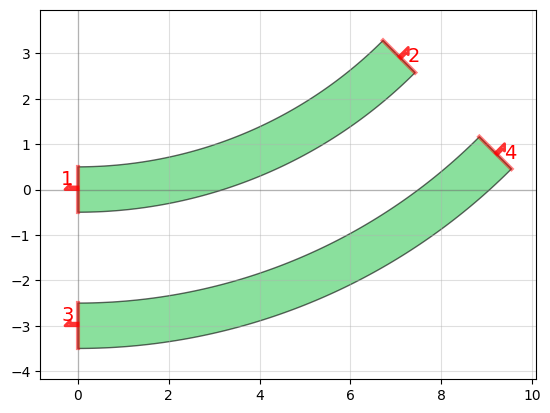

In [83]:
# Create the Path
P = pp.arc(radius = 10, angle = 45)

# Create two cross-sections: one fixed width, one modulated by my_custom_offset_fun
X = CrossSection()
X.add(width = 1, offset = 0, layer = 0, ports = (1,2), name = 'myelement1')
X.add(width = 1, offset = 3, layer = 0, ports = (3,4), name = 'myelement2')

# Extrude the Path to create the Device
D = P.extrude(X)

qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


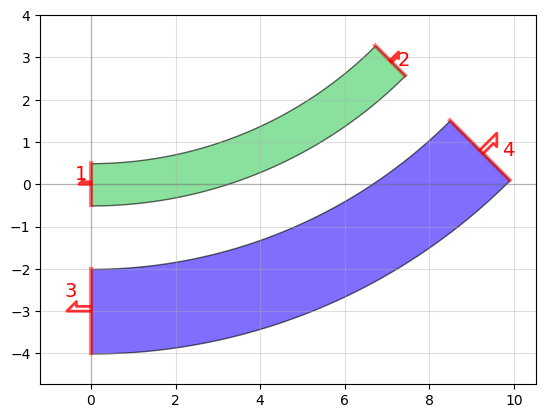

In [84]:
# Copy our original CrossSection
Xcopy = X.copy()

# Modify
Xcopy['myelement2']['width'] = 2 # X['myelement2'] is a dictionary
Xcopy['myelement2']['layer'] = 1 # X['myelement2'] is a dictionary

# Extrude the Path to create the Device
D = P.extrude(Xcopy)

qp(D)

# Routing

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


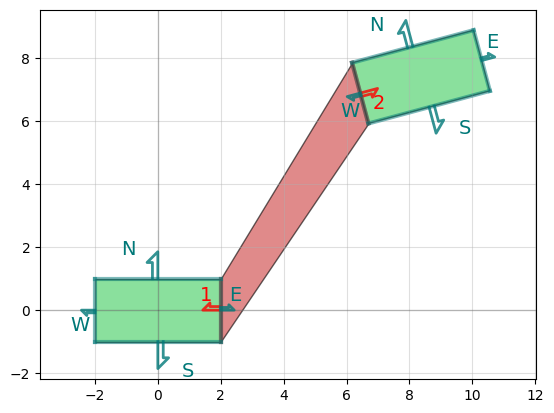

In [85]:
from phidl import Device, quickplot as qp
import phidl.geometry as pg
import phidl.routing as pr

# Use pg.compass() to make 2 boxes with North/South/East/West ports
D = Device()
c1 = D << pg.compass()
c2 = D << pg.compass().move([10,5]).rotate(15)

# Connect the East port of one box to the West port of the other
R = pr.route_quad(c1.ports['E'], c2.ports['W'],
                  width1 = None, width2 = None,  # width = None means use Port width
                  layer = 2)
qp([R,D])

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


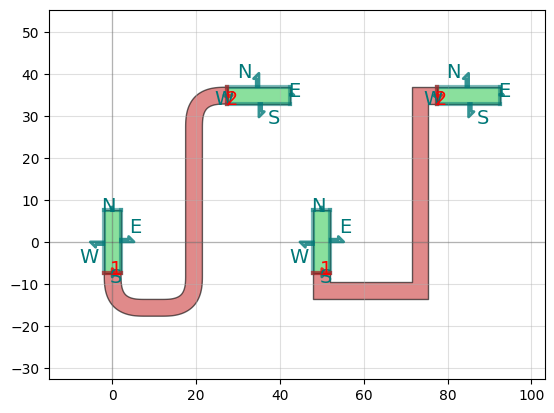

In [86]:
from phidl import Device, quickplot as qp
import phidl.geometry as pg
import phidl.routing as pr

# Use pg.compass() to make 4 boxes with North/South/East/West ports
D = Device()
smooth1 = D << pg.compass([4,15])
smooth2 = D << pg.compass([15,4]).move([35,35])
sharp1 = D << pg.compass([4,15]).movex(50)
sharp2 = D << pg.compass([15,4]).move([35,35]).movex(50)

# Connect the South port of one box to the West port of the other
R1 = pr.route_smooth(smooth1.ports['S'], smooth2.ports['W'], radius=8, layer = 2)
R2 = pr.route_sharp(  sharp1.ports['S'],  sharp2.ports['W'], layer = 2)

qp([D, R1, R2])

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


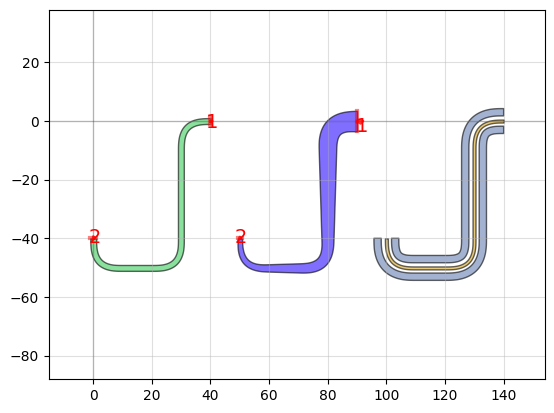

In [87]:
from phidl import CrossSection
import phidl.routing as pr

# Create input ports
port1 = D.add_port(name='smooth1', midpoint=(40,  0), width=5, orientation=180)
port2 = D.add_port(name='smooth2', midpoint=(0, -40), width=5, orientation=270)

# (left) Setting width to a constant
D1 = pr.route_smooth(port1, port2, width = 2, radius=10, layer = 0)

# (middle) Setting width to a 2-element list to linearly vary the width
D2 = pr.route_smooth(port1, port2, width = [7, 1.5], radius=10, layer = 1)

# (right) Setting width to a CrossSection
X = CrossSection()
X.add(width=1, layer=4)
X.add(width=2.5, offset =  3, layer = 5)
X.add(width=2.5, offset = -3, layer = 5)
D3 = pr.route_smooth(port1, port2, width = X, radius=10)

qp([D1, D2.movex(50), D3.movex(100)])

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


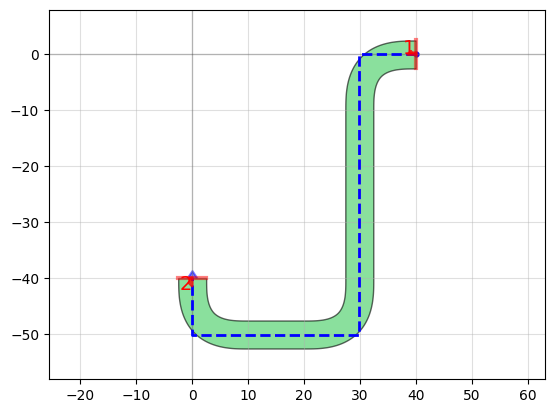

In [88]:
from phidl import CrossSection
import phidl.path as pp

D = Device()
port1 = D.add_port(name=1, midpoint=(40,0), width=5, orientation=180)
port2 = D.add_port(name=2, midpoint=(0, -40), width=5, orientation=270)

# Step 1: Calculate waypoint path
route_path = pr.path_manhattan(port1, port2, radius=10)
# Step 2: Smooth waypoint path
smoothed_path = pp.smooth(route_path, radius=10, use_eff=True)
# Step 3: Extrude path
D.add_ref(smoothed_path.extrude(width=5, layer=0))

qp([route_path,D])

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


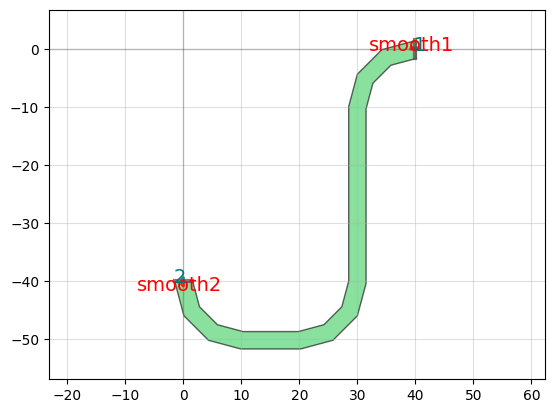

In [89]:
D = Device()
port1 = D.add_port(name='smooth1', midpoint=(40,0), width=3, orientation=180)
port2 = D.add_port(name='smooth2', midpoint=(0, -40), width=3, orientation=270)
D.add_ref(pr.route_smooth(port1, port2, radius=10, smooth_options={'corner_fun': pp.arc, 'num_pts': 16}))
qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


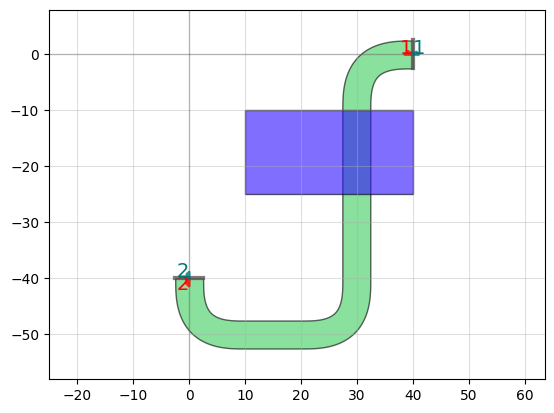

In [90]:
import phidl.geometry as pg

D = Device()
Obstacle = D.add_ref(pg.rectangle(size=(30,15), layer=1)).move((10, -25))

port1 = D.add_port(name=1, midpoint=(40,0), width=5, orientation=180)
port2 = D.add_port(name=2, midpoint=(0, -40), width=5, orientation=270)

D.add_ref(pr.route_smooth(port1, port2, radius=10, path_type='manhattan'))
qp(D)

Ignoring fixed x limits to fulfill fixed data aspect with adjustable data limits.


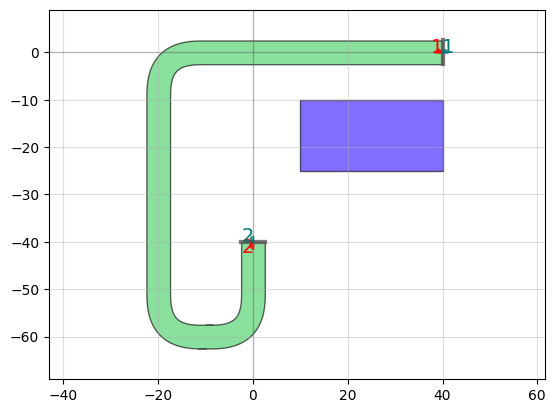

In [91]:
D = Device()
Obstacle = D.add_ref(pg.rectangle(size=(30,15), layer=1))
Obstacle.move((10, -25))
port1 = D.add_port(name=1, midpoint=(40,0), width=5, orientation=180)
port2 = D.add_port(name=2, midpoint=(0, -40), width=5, orientation=270)

D.add_ref(pr.route_smooth(port1, port2, radius=10, path_type='J', length1=60, length2=20))
qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


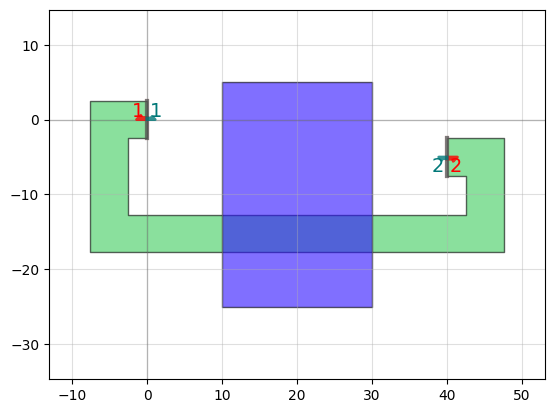

In [92]:
D = Device()
Obstacle = D.add_ref(pg.rectangle(size=(20,30),layer=1))
Obstacle.move((10, -25))
port1 = D.add_port(name=1, midpoint=(0,0), width=5, orientation=180)
port2 = D.add_port(name=2, midpoint=(40, -5), width=5, orientation=0)

D.add_ref(pr.route_sharp(port1, port2, path_type='manhattan'))
qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


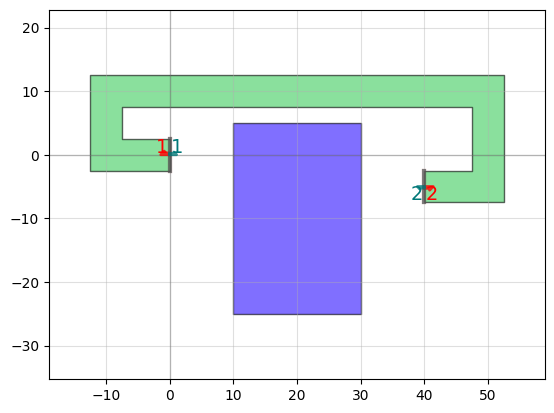

In [93]:
D = Device()
Obstacle = D.add_ref(pg.rectangle(size=(20,30),layer=1))
Obstacle.move((10, -25))
port1 = D.add_port(name=1, midpoint=(0,0), width=5, orientation=180)
port2 = D.add_port(name=2, midpoint=(40, -5), width=5, orientation=0)

D.add_ref(pr.route_sharp(port1, port2, path_type='C', length1=10, length2=10, left1=-10))
qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


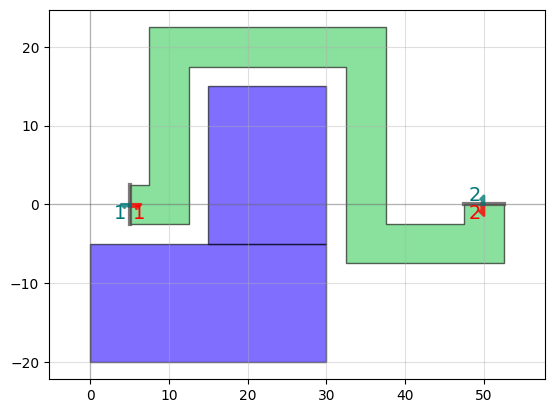

In [94]:
D = Device()
Obstacle = D.add_ref(pg.rectangle(size=(30,15),layer=1)).move((0, -20))
Obstacle2 = D.add_ref(pg.rectangle(size=(15,20), layer=1))
Obstacle2.xmax,Obstacle2.ymin = Obstacle.xmax, Obstacle.ymax

port1 = D.add_port(name=1, midpoint=(5,  0), width=5, orientation=0)
port2 = D.add_port(name=2, midpoint=(50, 0), width=5, orientation=270)

manual_path = [ port1.midpoint,
                (Obstacle2.xmin-5, port1.y),
                (Obstacle2.xmin-5, Obstacle2.ymax+5),
                (Obstacle2.xmax+5, Obstacle2.ymax+5),
                (Obstacle2.xmax+5, port2.y-5),
                (port2.x, port2.y-5),
                port2.midpoint ]

D.add_ref(pr.route_sharp(port1, port2, path_type='manual', manual_path=manual_path))
qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


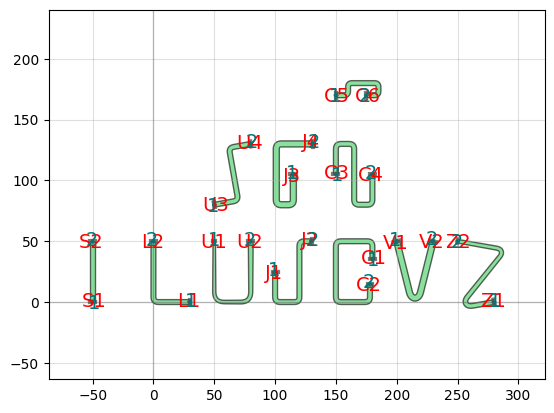

In [95]:
D = Device()

#straight path
port1 = D.add_port(name='S1', midpoint=(-50, 0), width=4, orientation=90)
port2 = D.add_port(name='S2', midpoint=(-50, 50), width=4, orientation=270)
D.add_ref(pr.route_smooth(port1, port2, path_type='straight'))
#L path
port1 = D.add_port(name='L1', midpoint=(30,0), width=4, orientation=180)
port2 = D.add_port(name='L2', midpoint=(0, 50), width=4, orientation=270)
D.add_ref(pr.route_smooth(port1, port2,  path_type='L'))
#U path
port1 = D.add_port(name='U1', midpoint=(50, 50), width=2, orientation=270)
port2 = D.add_port(name='U2', midpoint=(80,50), width=4, orientation=270)
D.add_ref(pr.route_smooth(port1, port2,  radius=10, path_type='U', length1=50))
port1 = D.add_port(name='U3', midpoint=(50, 80), width=4, orientation=10)
port2 = D.add_port(name='U4', midpoint=(80, 130), width=4, orientation=190)
D.add_ref(pr.route_smooth(port1, port2,  path_type='U', length1=20))
#J path
port1 = D.add_port(name='J1', midpoint=(100, 25), width=4, orientation=270)
port2 = D.add_port(name='J2', midpoint=(130, 50), width=4,  orientation=180)
D.add_ref(pr.route_smooth(port1, port2,  path_type='J', length1=25, length2=10))
port1 = D.add_port(name='J3', midpoint=(115, 105), width=5, orientation=270)
port2 = D.add_port(name='J4', midpoint=(131, 130), width=5,  orientation=180)
D.add_ref(pr.route_smooth(port1, port2, path_type='J', length1=25, length2=30))
#C path
port1 = D.add_port(name='C1', midpoint=(180, 35), width=4, orientation=90)
port2 = D.add_port(name='C2', midpoint=(178, 15), width=4, orientation=270)
D.add_ref(pr.route_smooth(port1, port2, path_type='C', length1=15, left1=30, length2=15))
port1 = D.add_port(name='C3', midpoint=(150, 105), width=4, orientation=90)
port2 = D.add_port(name='C4', midpoint=(180, 105), width=4, orientation=270)
D.add_ref(pr.route_smooth(port1, port2, path_type='C', length1=25, left1=-15, length2=25))
port1 = D.add_port(name='C5', midpoint=(150, 170), width=4, orientation=0)
port2 = D.add_port(name='C6', midpoint=(175, 170), width=4, orientation=0)
D.add_ref(pr.route_smooth(port1, port2, path_type='C', length1=10, left1=10, length2=10, radius=4))
#V path
port1 = D.add_port(name='V1', midpoint=(200,50), width=5, orientation=284)
port2 = D.add_port(name='V2', midpoint=(230, 50), width=5, orientation=270-14)
D.add_ref(pr.route_smooth(port1, port2, path_type='V'))
#Z path
port1 = D.add_port(name='Z1', midpoint=(280,0), width=4, orientation=190)
port2 = D.add_port(name='Z2', midpoint=(250, 50), width=3, orientation=-10)
D.add_ref(pr.route_smooth(port1, port2, path_type='Z', length1=30, length2=40))


qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


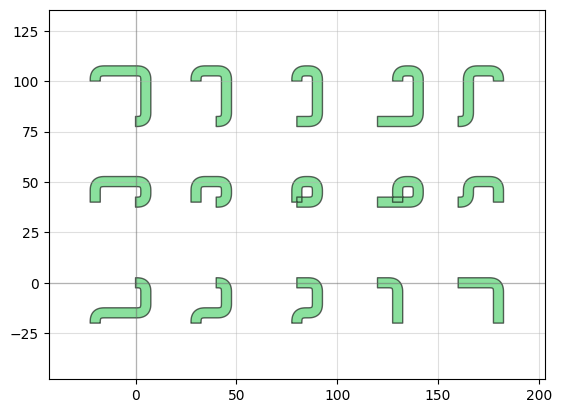

In [97]:
import numpy as np
from phidl import set_quickplot_options
set_quickplot_options(show_ports=False, show_subports=False)

D = Device()
pitch = 40
test_range=20
x_centers = np.arange(5)*pitch
y_centers = np.arange(3)*pitch
xoffset = np.linspace(-1*test_range, test_range, 5)
yoffset = np.linspace(-1*test_range, test_range, 3)
for xidx, x0 in enumerate(x_centers):
    for yidx, y0 in enumerate(y_centers):
        name = '{}{}'.format(xidx, yidx)
        port1 = D.add_port(name=name+'1', midpoint=(x0, y0), width=5, orientation=0)
        port2 = D.add_port(name=name+'2', midpoint=(x0+xoffset[xidx], y0+yoffset[yidx]),
                           width=5,  orientation=90)
        D.add_ref(pr.route_smooth(port1, port2, route_type='manhattan'))
qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


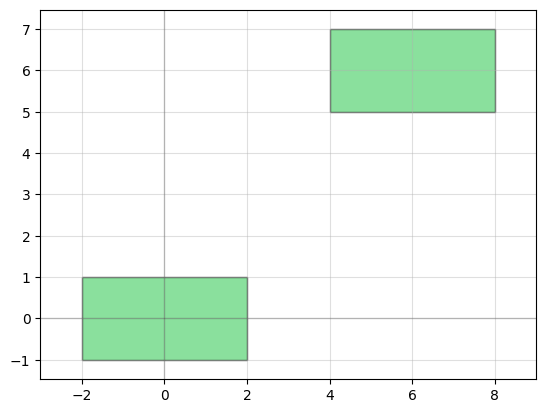

In [98]:
from phidl import Device, quickplot as qp
import phidl.routing as pr
import phidl.geometry as pg

# Create boxes with multiple North/South ports
D = Device()
c1 = D.add_ref( pg.compass_multi(ports={'N':3}) )
c2 = D.add_ref( pg.compass_multi(ports={'S':3}) ).move([6,6])

qp(D)

Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


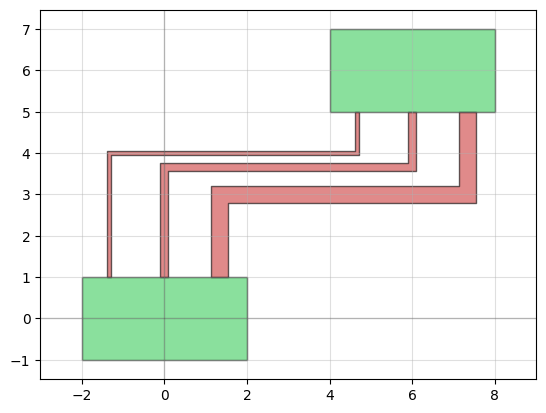

In [99]:
D.add_ref( pr.route_xy(port1 = c1.ports['N1'], port2 = c2.ports['S1'],
    directions = 'yyyxy', width = 0.1, layer = 2) )
D.add_ref( pr.route_xy(port1 = c1.ports['N2'], port2 = c2.ports['S2'],
    directions = 'yyxy',  width = 0.2, layer = 2) )
D.add_ref( pr.route_xy(port1 = c1.ports['N3'], port2 = c2.ports['S3'],
    directions = 'yxy',   width = 0.4, layer = 2) )

qp(D)